# Load the Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import researchpy as rp
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import re
from collections import Counter
import itertools

ImportError: cannot import name 'cbook' from partially initialized module 'matplotlib' (most likely due to a circular import) (c:\Users\seagu\Anaconda3\lib\site-packages\matplotlib\__init__.py)

In [4]:
#Display full contents of a dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

# Import the Dataset

In [5]:
df=pd.read_csv('C:/Users/seagu/Downloads/Nashville_housing_data.csv',na_values='Nan')
df.head()

Unnamed: 0        Parcel ID       Land Use   Property Address  \
0  1           105 11 0 080.00  SINGLE FAMILY  1802  STEWART PL    
1  2           118 03 0 130.00  SINGLE FAMILY  2761  ROSEDALE PL   
2  3           119 01 0 479.00  SINGLE FAMILY  224  PEACHTREE ST   
3  4           119 05 0 186.00  SINGLE FAMILY  316  LUTIE ST       
4  5           119 05 0 387.00  SINGLE FAMILY  2626  FOSTER AVE    

   Suite/ Condo   # Property City  Sale Date   Legal Reference Sold As Vacant  \
0 NaN                NASHVILLE     1/11/2013  20130118-0006337  No              
1 NaN                NASHVILLE     1/18/2013  20130124-0008033  No              
2 NaN                NASHVILLE     1/18/2013  20130128-0008863  No              
3 NaN                NASHVILLE     1/23/2013  20130131-0009929  No              
4 NaN                NASHVILLE     1/4/2013   20130118-0006110  No              

  Multiple Parcels Involved in Sale       City State  Acreage  \
0  No                                NASHVILLE  TN    0.17      
1  No                                NASHVILLE  TN    0.11      
2  No                                NASHVILLE  TN    0.17      
3  No                                NASHVILLE  TN    0.34      
4  No                                NASHVILLE  TN    0.17      

              Tax District  Neighborhood  Land Value  Building Value  \
0  URBAN SERVICES DISTRICT  3127          32000       134400           
1  CITY OF BERRY HILL       9126          34000       157800           
2  URBAN SERVICES DISTRICT  3130          25000       243700           
3  URBAN SERVICES DISTRICT  3130          25000       138100           
4  URBAN SERVICES DISTRICT  3130          25000       86100            

   Finished Area Foundation Type  Year Built Exterior Wall Grade  Bedrooms  \
0  1149.00000     PT BSMT         1941        BRICK         C     2.0        
1  2090.82495     SLAB            2000        BRICK/FRAME   C     3.0        
2  2145.60001     FULL BSMT       1948        BRICK/FRAME   B     4.0        
3  1969.00000     CRAWL           1910        FRAME         C     2.0        
4  1037.00000     CRAWL           1945        FRAME         C     2.0        

   Full Bath  Half Bath Sale Price Compared To Value  
0  1.0        0.0        Over                         
1  2.0        1.0        Over                         
2  2.0        0.0        Under                        
3  1.0        0.0        Under                        
4  1.0        0.0        Under

# Data Cleaning

In [6]:
#drop unnecessary columns
df=df.drop(["Unnamed: 0",'Property Address',"Parcel ID","Legal Reference"],axis=1)

In [7]:
#change column names
df.rename(
    columns={ "Land Use": "Land_Use", "Sale Date": "Sale_Date", "Sold As Vacant": "Sold_As_Vacant", "Property City": "Property_City",
    "Multiple Parcels Involved in Sale": "Multiple_Parcels_Involved_in_Sale", "Tax District": "Tax_District", "Land Value": "Land_Value",
    "Building Value": "Building_Value", "Finished Area": "Finished_Area", "Foundation Type": "Foundation_Type",
    "Year Built": "Year_Built", "Exterior Wall": "Exterior_Wall", "Full Bath": "Full_Bath",
    "Half Bath": "Half_Bath", "Sale Price Compared To Value": "Sale_Price_Compared_To_Value"},
    inplace=True,
)

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22651 entries, 0 to 22650
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Land_Use                           22651 non-null  object 
 1   Suite/ Condo   #                   0 non-null      float64
 2   Property_City                      22649 non-null  object 
 3   Sale_Date                          22651 non-null  object 
 4   Sold_As_Vacant                     22651 non-null  object 
 5   Multiple_Parcels_Involved_in_Sale  22651 non-null  object 
 6   City                               22651 non-null  object 
 7   State                              22651 non-null  object 
 8   Acreage                            22651 non-null  float64
 9   Tax_District                       22651 non-null  object 
 10  Neighborhood                       22651 non-null  int64  
 11  Land_Value                         22651 non-null  int

In [8]:
#convert data type
df['Sale_Date']=df['Sale_Date'].apply(pd.to_datetime)

In [9]:
#create new variable Sold_Year and Sold_Month
df['Sale_Year'] = pd.DatetimeIndex(df['Sale_Date']).year
df['Sale_Month'] = pd.DatetimeIndex(df['Sale_Date']).month

df=df.drop(['Sale_Date'],axis=1)

In [51]:
data_types  = ["float32","float64","int32","int64","object","category","datetime64[ns]"]

def display_data_description(data, Numerical_data_types, categorical_data_types):
    
    print("Data Description :")
    display(data.describe().T)
    display(data.describe(include=np.object).T)

display_data_description(df,data_types[0:4] ,data_types[4:7])

Data Description :


count           mean            std      min      25%  \
Acreage         22651.0  0.454705       0.611818       0.04     0.2       
Neighborhood    22651.0  4432.715024    2142.803595    107.00   3130.0    
Land_Value      22651.0  70137.969008   102903.504144  900.00   22000.0   
Building_Value  22651.0  172240.222286  189642.443141  1400.00  85500.0   
Finished_Area   22650.0  1915.377151    1079.094521    450.00   1250.0    
Year_Built      22651.0  1961.947684    25.843908      1832.00  1947.0    
Bedrooms        22648.0  3.104910       0.829287       0.00     3.0       
Full_Bath       22650.0  1.887285       0.951220       0.00     1.0       
Half_Bath       22543.0  0.270239       0.480186       0.00     0.0       
Sale_Year       22651.0  2014.565008    1.082778       2013.00  2014.0    
Sale_Month      22651.0  6.597236       3.077129       1.00     4.0       

                          50%         75%           max  
Acreage         0.280000       0.460       1.750000e+01  
Neighborhood    4026.000000    6229.000    9.530000e+03  
Land_Value      30000.000000   60300.000   1.869000e+06  
Building_Value  118800.000000  188250.000  5.824300e+06  
Finished_Area   1645.824995    2213.375    1.972825e+04  
Year_Built      1959.000000    1977.000    2.017000e+03  
Bedrooms        3.000000       4.000       1.100000e+01  
Full_Bath       2.000000       2.000       1.000000e+01  
Half_Bath       0.000000       1.000       3.000000e+00  
Sale_Year       2015.000000    2015.000    2.016000e+03  
Sale_Month      7.000000       9.000       1.200000e+01

C:\Users\seagu\AppData\Local\Temp\ipykernel_4760\1043939486.py:7: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  display(data.describe(include=np.object).T)


count unique                      top  \
Land_Use                           22651  4      SINGLE FAMILY             
Property_City                      22649  10     NASHVILLE                 
Sold_As_Vacant                     22651  2      No                        
Multiple_Parcels_Involved_in_Sale  22651  2      No                        
City                               22651  10     NASHVILLE                 
Tax_District                       22651  7      URBAN SERVICES DISTRICT   
Foundation_Type                    22650  6      CRAWL                     
Exterior_Wall                      22651  9      BRICK                     
Grade                              22651  10     C                         
Sale_Price_Compared_To_Value       22651  2      Over                      

                                    freq  
Land_Use                           21390  
Property_City                      18010  
Sold_As_Vacant                     22517  
Multiple_Parcels_Involved_in_Sale  22183  
City                               18013  
Tax_District                       17497  
Foundation_Type                    14210  
Exterior_Wall                      11547  
Grade                              16235  
Sale_Price_Compared_To_Value       17047

In [10]:
#Drop column with only one value
df=df.drop(['State','Suite/ Condo   #'],axis=1)

In [59]:
#Draw Boxplot for all Numerical Values
numeric_columns=df.select_dtypes(include="number")

def Boxplot_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols,figsize=(16,16))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(dataset[data], ax=axs[i])
        axs[i].set_title('Boxplot of '+ data)

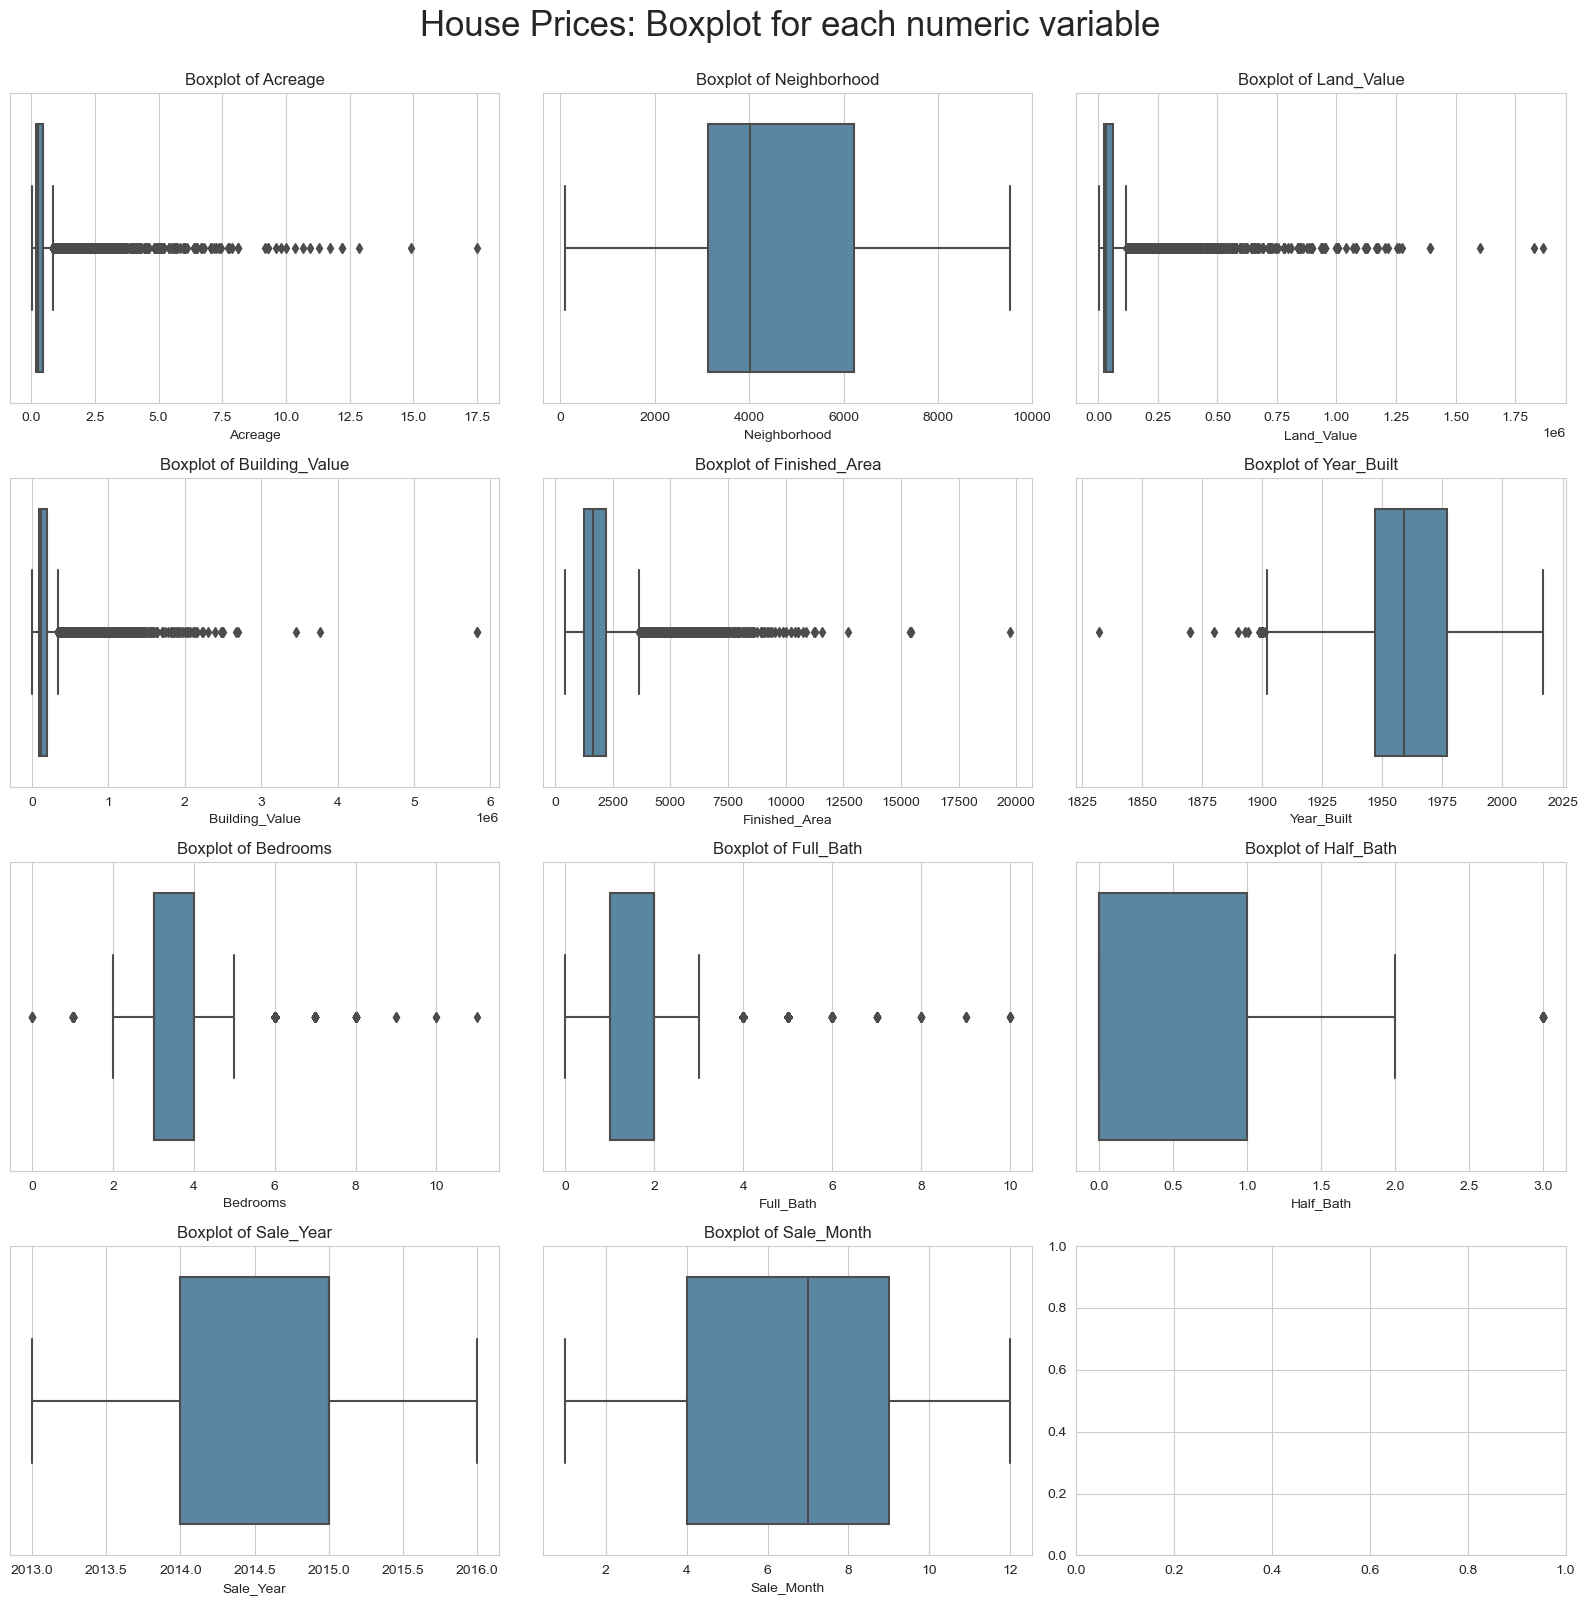

In [61]:
Boxplot_custom(dataset=df, columns_list=numeric_columns, rows=4, cols=3, suptitle='House Prices: Boxplot for each numeric variable')
plt.tight_layout()

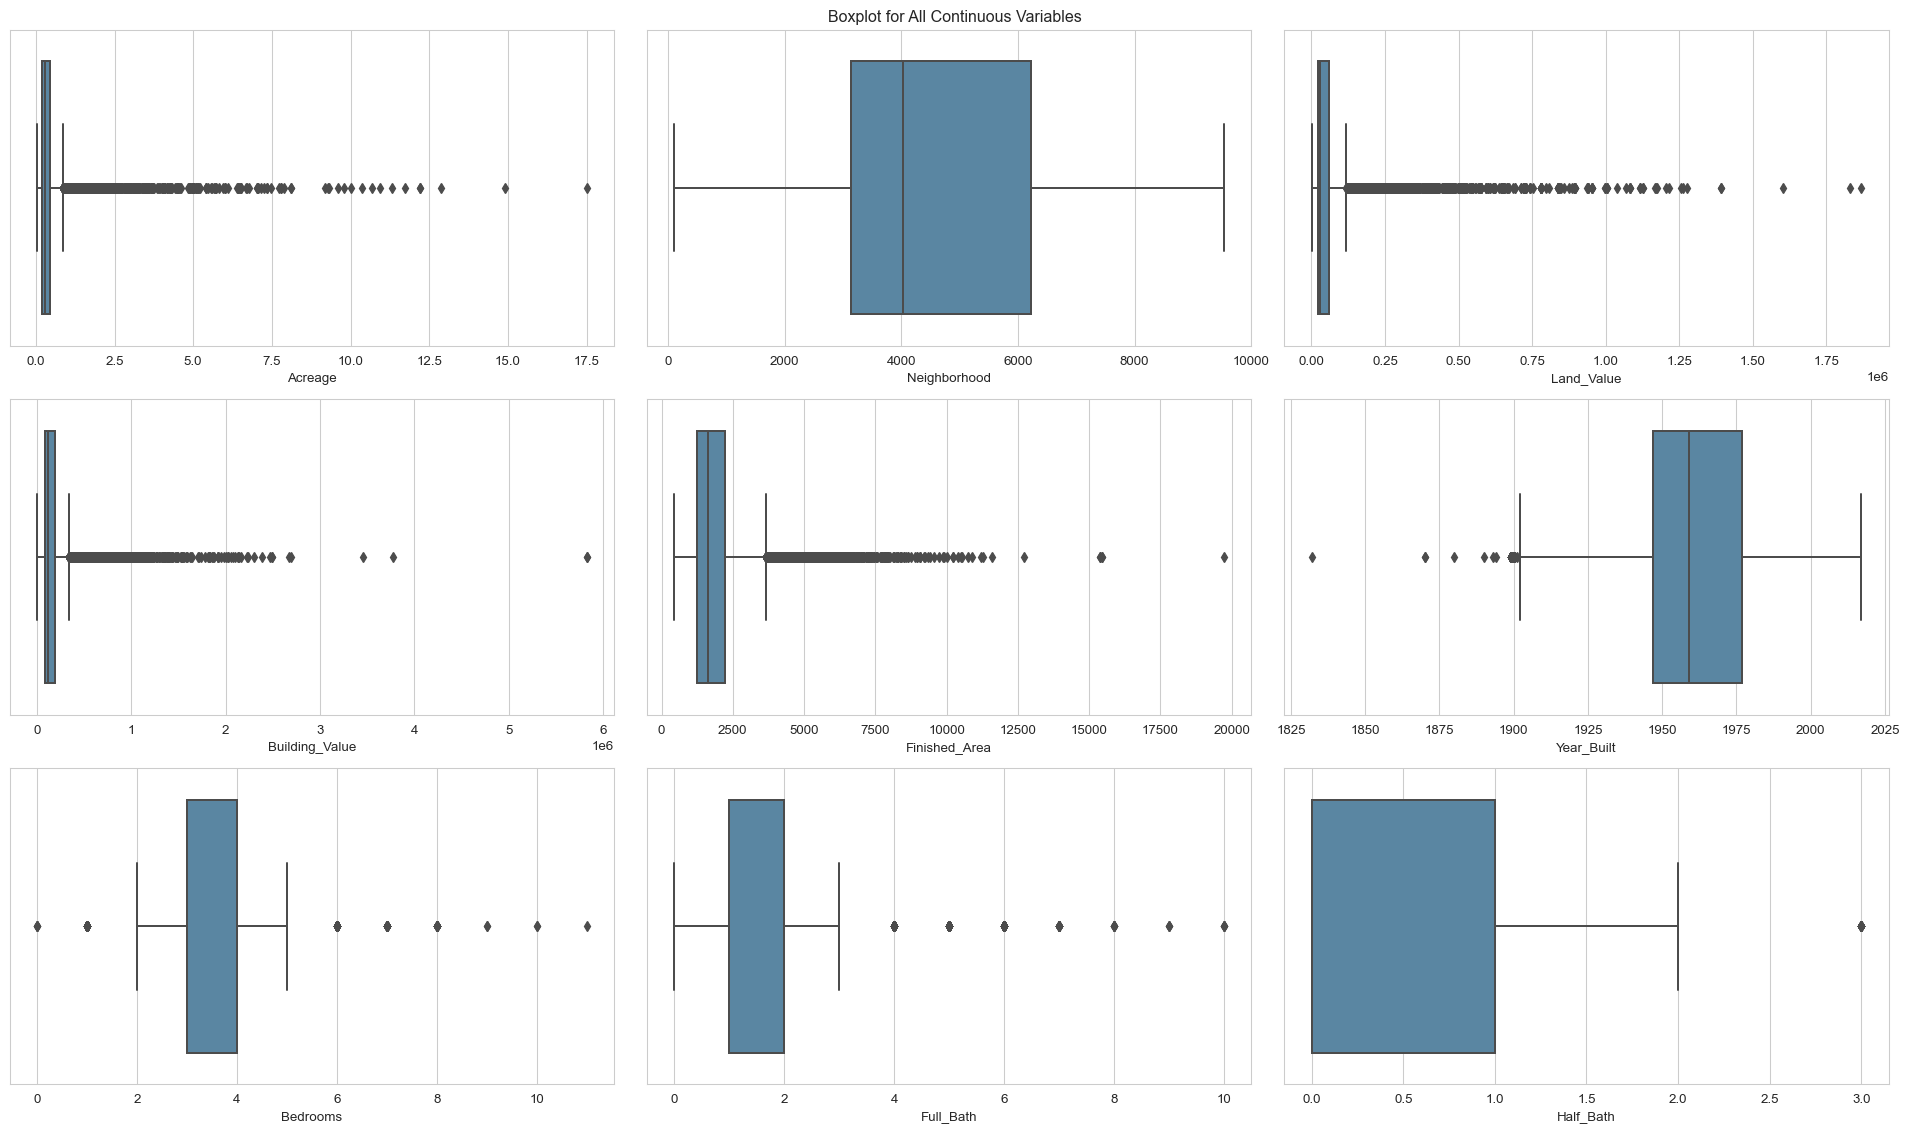

In [55]:
#check outliers in the numerical variables
fig, axs = plt.subplots(3,3,figsize=(20,12), dpi=96)

ax=sns.boxplot(x=df['Acreage'], ax=axs[0,0])
ax=sns.boxplot(x=df['Neighborhood'], ax=axs[0,1])
ax=sns.boxplot(x=df['Land_Value'], ax=axs[0,2])
ax=sns.boxplot(x=df['Building_Value'], ax=axs[1,0])
ax=sns.boxplot(x=df['Finished_Area'], ax=axs[1,1])
ax=sns.boxplot(x=df['Year_Built'], ax=axs[1,2])
ax=sns.boxplot(x=df['Bedrooms'], ax=axs[2,0])
ax=sns.boxplot(x=df['Full_Bath'], ax=axs[2,1])
ax=sns.boxplot(x=df['Half_Bath'], ax=axs[2,2])

plt.suptitle("Boxplot for All Continuous Variables")
plt.tight_layout()
plt.show()

In [248]:
# Outliers treatment
# df=df[df['Half_Bath']<3]
# df=df[df['Year_Built']>1901]


In [14]:
#check missing value
null_df = df.isnull().sum() / df.shape[0] * 100
null_df

Land_Use                             0.0
Property_City                        0.0
Sold_As_Vacant                       0.0
Multiple_Parcels_Involved_in_Sale    0.0
City                                 0.0
Acreage                              0.0
Tax_District                         0.0
Neighborhood                         0.0
Land_Value                           0.0
Building_Value                       0.0
Finished_Area                        0.0
Foundation_Type                      0.0
Year_Built                           0.0
Exterior_Wall                        0.0
Grade                                0.0
Bedrooms                             0.0
Full_Bath                            0.0
Half_Bath                            0.0
Sale_Price_Compared_To_Value         0.0
Sale_Price                           0.0
Sale_Year                            0.0
Sale_Month                           0.0
dtype: float64

In [11]:
#the null value in Half_Bath means there is no half_bath, so we will impute the NA with 0.
df['Half_Bath']=df['Half_Bath'].fillna(0)

In [12]:
#since all the missing value are less than 0.01%, we can just drop them
df=df.dropna()

In [13]:
# Check for duplicate 
print('Duplicated value(s) in our dataset : ', df.duplicated().sum())

Duplicated value(s) in our dataset :  219


In [14]:
#drop the duplicates
df=df.drop_duplicates()

In [170]:
# check for unique value
def check_data_unique(df):
    for column in df.columns:
        uniques = df[column].unique()
        print('{0:20s} {1:5d}\t'.format(column, len(uniques)), uniques[:10])
check_data_unique(df)

Land_Use                 4	 ['SINGLE FAMILY' 'DUPLEX' 'RESIDENTIAL COMBO/MISC' 'QUADPLEX']
Property_City           10	 ['NASHVILLE' 'ANTIOCH' 'BRENTWOOD' 'MADISON' 'OLD HICKORY' 'HERMITAGE'
 'GOODLETTSVILLE' 'JOELTON' 'WHITES CREEK' 'MOUNT JULIET']
Sold_As_Vacant           2	 ['No' 'Yes']
Multiple_Parcels_Involved_in_Sale     2	 ['No' 'Yes']
City                    10	 ['NASHVILLE' 'ANTIOCH' 'BRENTWOOD' 'MADISON' 'OLD HICKORY' 'HERMITAGE'
 'GOODLETTSVILLE' 'JOELTON' 'WHITES CREEK' 'MOUNT JULIET']
Acreage                407	 [0.17 0.11 0.34 0.2  0.4  0.23 0.29 0.25 0.27 0.35]
Tax_District             7	 ['URBAN SERVICES DISTRICT' 'CITY OF BERRY HILL'
 'GENERAL SERVICES DISTRICT' 'CITY OF BELLE MEADE' 'CITY OF OAK HILL'
 'CITY OF FOREST HILLS' 'CITY OF GOODLETTSVILLE']
Neighborhood           187	 [3127 9126 3130 3179 3131 3926 4026 3927 3928 4028]
Land_Value             884	 [32000 34000 25000 16000 21500 47000 28000 21000 15000 55000]
Building_Value        4294	 [134400 157800 243700 13

In [15]:
# create new variables Total_Value
df['Total_Value']=df['Building_Value']+df['Land_Value']

In [19]:
a=df['Property_City'].value_counts()
a

NASHVILLE         17941
MADISON           1142 
ANTIOCH           1123 
HERMITAGE         913  
OLD HICKORY       824  
GOODLETTSVILLE    434  
BRENTWOOD         158  
WHITES CREEK      13   
JOELTON           11   
MOUNT JULIET      6    
Name: Property_City, dtype: int64

In [20]:
b=df['City'].value_counts()
b

NASHVILLE         17942
MADISON           1142 
ANTIOCH           1123 
HERMITAGE         913  
OLD HICKORY       824  
GOODLETTSVILLE    434  
BRENTWOOD         157  
WHITES CREEK      13   
JOELTON           11   
MOUNT JULIET      6    
Name: City, dtype: int64

In [16]:
#the value in 'city' and 'property city' are identical, drop one of them 
df=df.drop('Property_City',axis=1)

In [89]:
#filter out city other than nashville
# df=df[df['City']=='NASHVILLE']

# EDA

### Set color Palette

In [17]:
sns.set_style("whitegrid")
custom_colors = ["#4e89ae", "#c56183","#ed6663","#ffa372"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))

sns.palplot(sns.color_palette(custom_colors),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)

## Univariate analysis:

In [19]:
def barPerc(df,xVar,ax):
    '''
    barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable 
        ax: Axes object (for Seaborn Countplot/Bar plot or
                         pandas bar plot)
    '''
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df[xVar].unique() if x==x])

    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom", fontsize = 7.5)

#### Under Price analysis

Imbalanced dataset, we need to use SMOTE before deefing the data into models

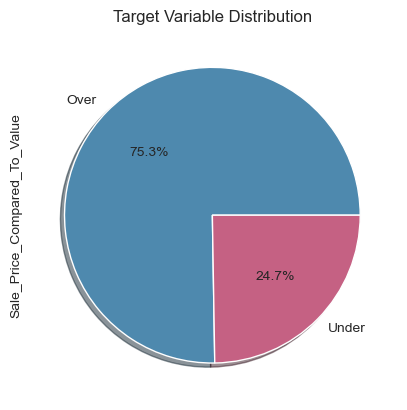

In [64]:
df['Sale_Price_Compared_To_Value'].value_counts().plot.pie(title="Target Variable Distribution",autopct='%1.1f%%',shadow=True,startangle=0)
plt.show()

#### Numerical

In [31]:
# Checking for distributions
def dist_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols,figsize=(16,16))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.kdeplot(dataset[data], ax=axs[i], fill=True,  alpha=.5, linewidth=0)
        axs[i].set_title(data + ', skewness is '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))

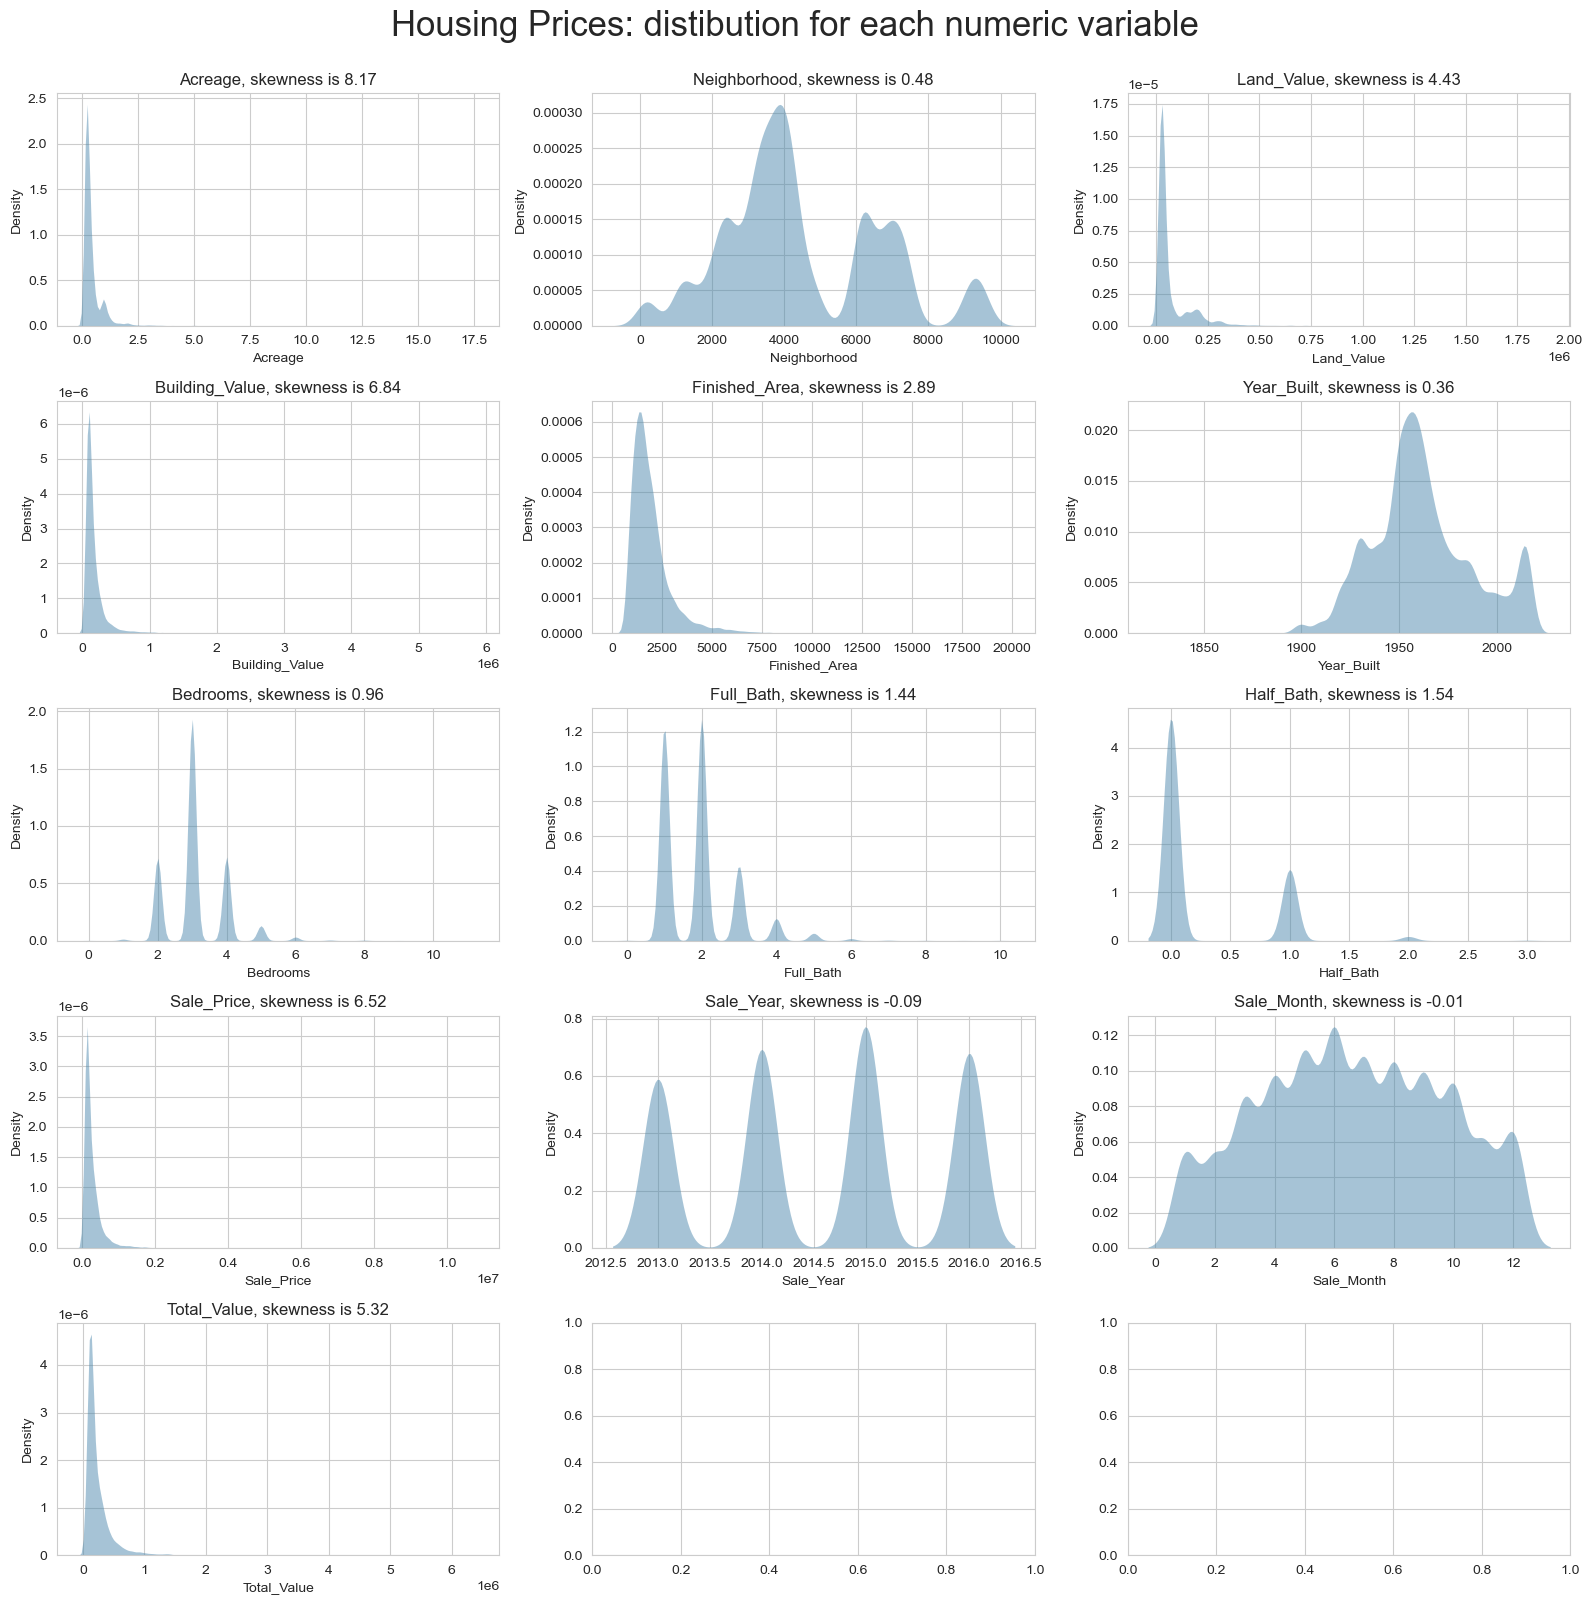

In [35]:
dist_custom(dataset=df, columns_list=numeric_columns, rows=5, cols=3, suptitle='Housing Prices: distibution for each numeric variable')
plt.tight_layout()

In [100]:
numeric_columns=df.select_dtypes(include="number")
numeric_columns.head()

Acreage  Neighborhood  Land_Value  Building_Value  Finished_Area  \
0  0.17     3127          32000       134400          1149.00000      
1  0.11     9126          34000       157800          2090.82495      
2  0.17     3130          25000       243700          2145.60001      
3  0.34     3130          25000       138100          1969.00000      
4  0.17     3130          25000       86100           1037.00000      

   Year_Built  Bedrooms  Full_Bath  Half_Bath  Sale_Year  Sale_Month  \
0  1941        2.0       1.0        0.0        2013       1            
1  2000        3.0       2.0        1.0        2013       1            
2  1948        4.0       2.0        0.0        2013       1            
3  1910        2.0       1.0        0.0        2013       1            
4  1945        2.0       1.0        0.0        2013       1            

   Total_Value  
0  166400       
1  191800       
2  268700       
3  163100       
4  111100

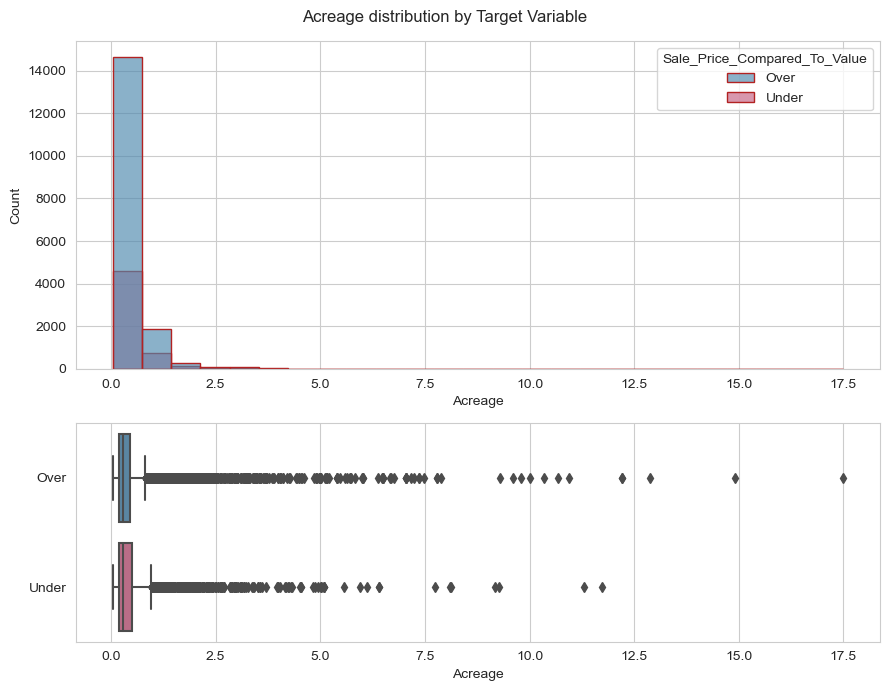

In [115]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(9, 7),gridspec_kw={'height_ratios': (.6, .4)})

sns.histplot(data=df,x="Acreage",hue='Sale_Price_Compared_To_Value',bins=25,alpha=0.66,edgecolor='firebrick',kde=False,ax=ax1)
sns.boxplot(x="Acreage", y='Sale_Price_Compared_To_Value', data=df,ax=ax2)
ax2.set_ylabel('')

ax2.set_yticklabels(['Over', 'Under'])
plt.suptitle("Acreage distribution by Target Variable")
plt.tight_layout()

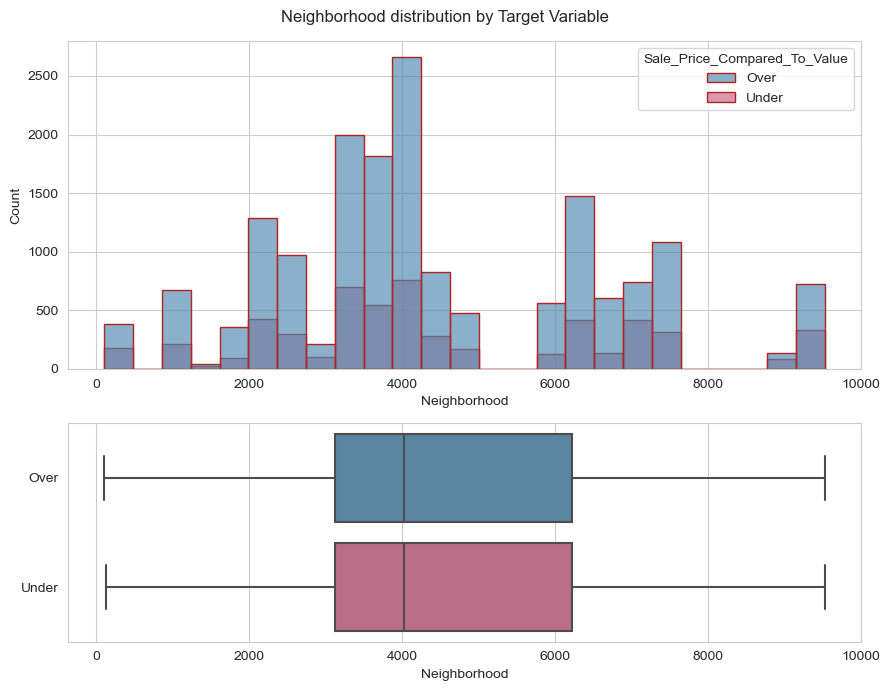

In [116]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(9, 7),gridspec_kw={'height_ratios': (.6, .4)})

sns.histplot(data=df,x="Neighborhood",hue='Sale_Price_Compared_To_Value',bins=25,alpha=0.66,edgecolor='firebrick',kde=False,ax=ax1)
sns.boxplot(x="Neighborhood", y='Sale_Price_Compared_To_Value', data=df,ax=ax2)
ax2.set_ylabel('')

ax2.set_yticklabels(['Over', 'Under'])
plt.suptitle("Neighborhood distribution by Target Variable")
plt.tight_layout()

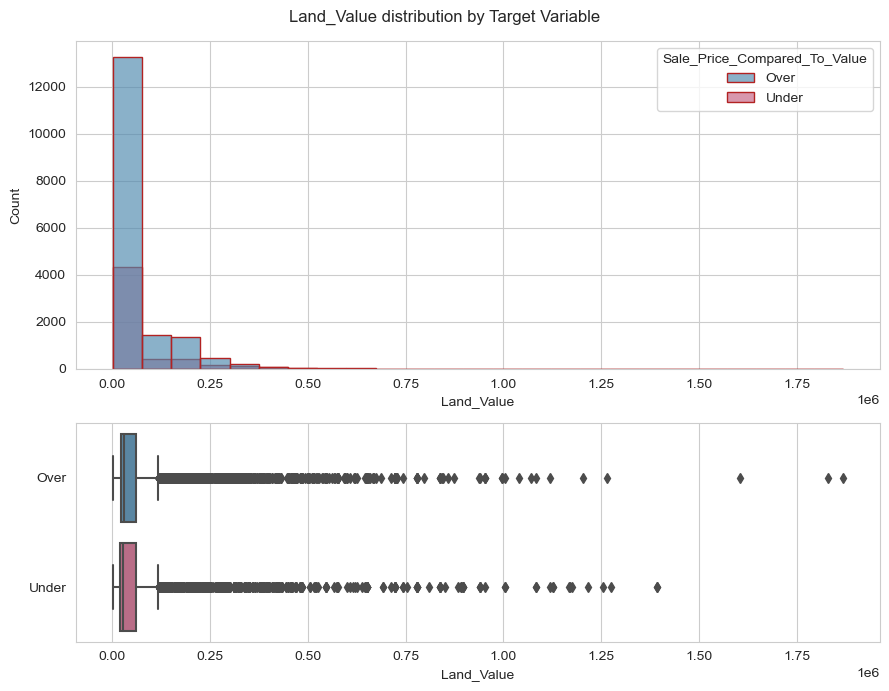

In [117]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(9, 7),gridspec_kw={'height_ratios': (.6, .4)})

sns.histplot(data=df,x="Land_Value",hue='Sale_Price_Compared_To_Value',bins=25,alpha=0.66,edgecolor='firebrick',kde=False,ax=ax1)
sns.boxplot(x="Land_Value", y='Sale_Price_Compared_To_Value', data=df,ax=ax2)
ax2.set_ylabel('')

ax2.set_yticklabels(['Over', 'Under'])
plt.suptitle("Land_Value distribution by Target Variable")
plt.tight_layout()

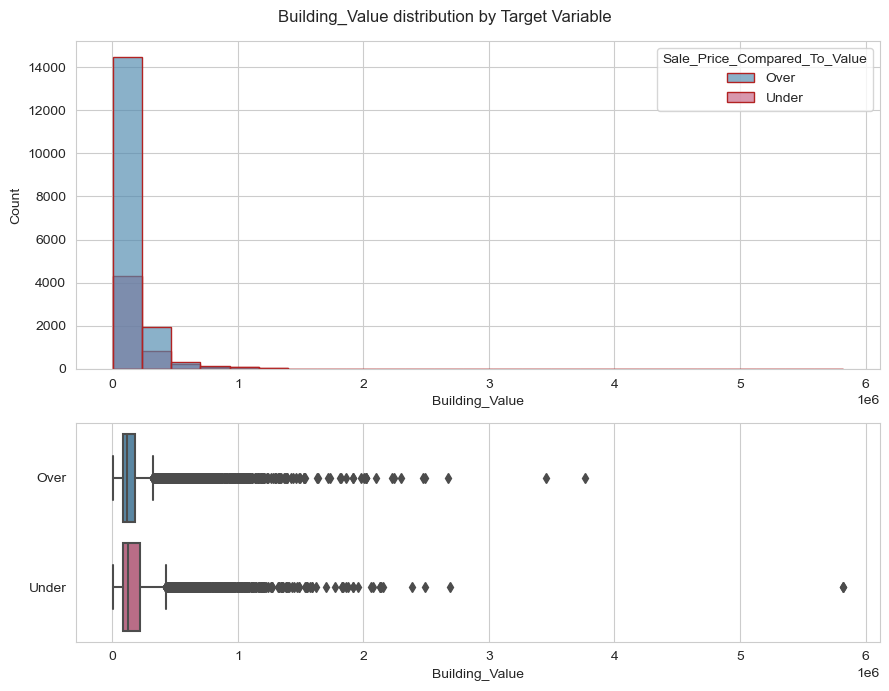

In [118]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(9, 7),gridspec_kw={'height_ratios': (.6, .4)})

sns.histplot(data=df,x="Building_Value",hue='Sale_Price_Compared_To_Value',bins=25,alpha=0.66,edgecolor='firebrick',kde=False,ax=ax1)
sns.boxplot(x="Building_Value", y='Sale_Price_Compared_To_Value', data=df,ax=ax2)
ax2.set_ylabel('')

ax2.set_yticklabels(['Over', 'Under'])
plt.suptitle("Building_Value distribution by Target Variable")
plt.tight_layout()

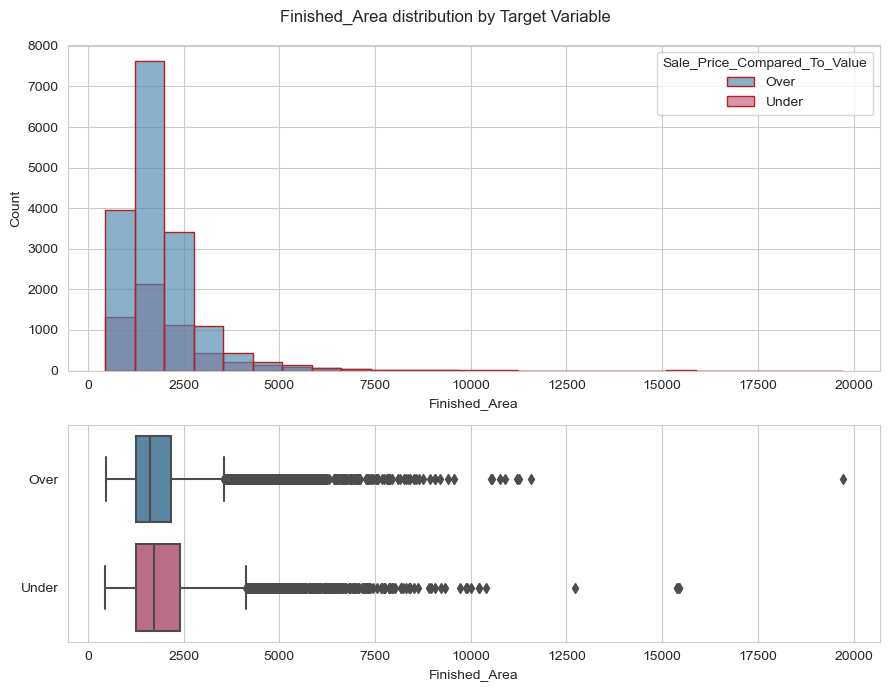

In [119]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(9, 7),gridspec_kw={'height_ratios': (.6, .4)})

sns.histplot(data=df,x="Finished_Area",hue='Sale_Price_Compared_To_Value',bins=25,alpha=0.66,edgecolor='firebrick',kde=False,ax=ax1)
sns.boxplot(x="Finished_Area", y='Sale_Price_Compared_To_Value', data=df,ax=ax2)
ax2.set_ylabel('')

ax2.set_yticklabels(['Over', 'Under'])
plt.suptitle("Finished_Area distribution by Target Variable")
plt.tight_layout()

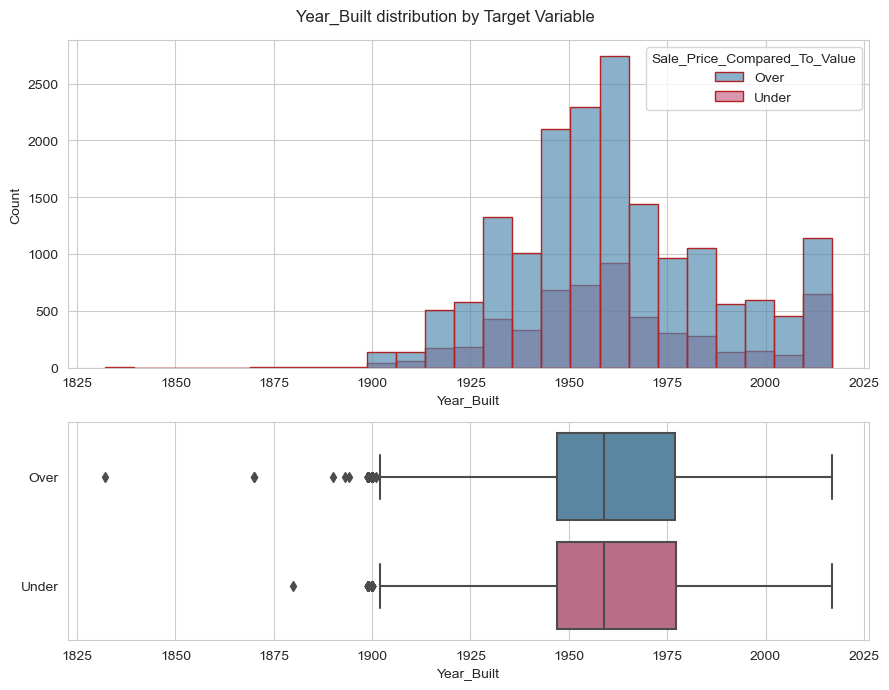

In [120]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(9, 7),gridspec_kw={'height_ratios': (.6, .4)})

sns.histplot(data=df,x="Year_Built",hue='Sale_Price_Compared_To_Value',bins=25,alpha=0.66,edgecolor='firebrick',kde=False,ax=ax1)
sns.boxplot(x="Year_Built", y='Sale_Price_Compared_To_Value', data=df,ax=ax2)
ax2.set_ylabel('')

ax2.set_yticklabels(['Over', 'Under'])
plt.suptitle("Year_Built distribution by Target Variable")
plt.tight_layout()

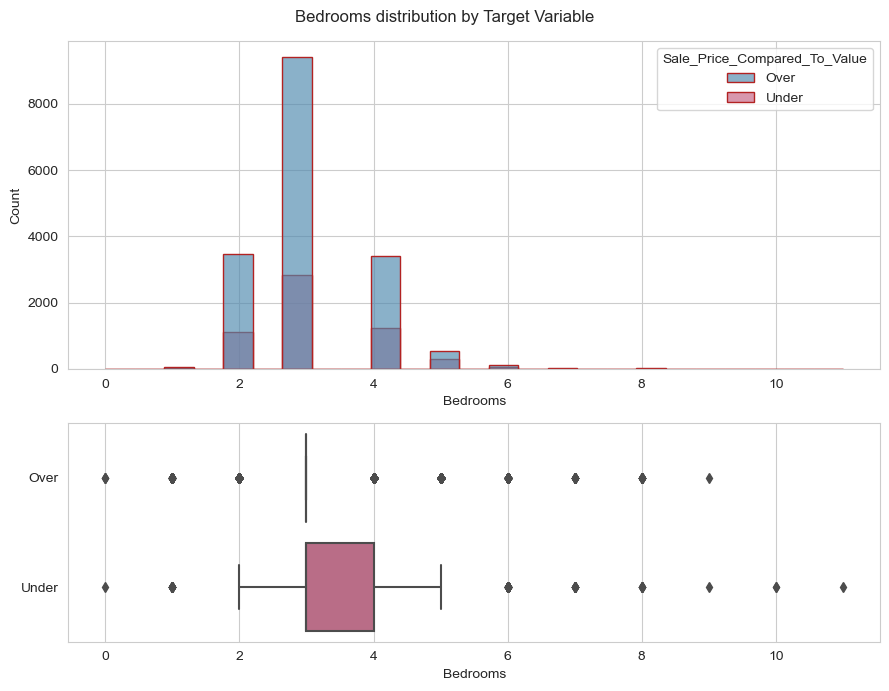

In [121]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(9, 7),gridspec_kw={'height_ratios': (.6, .4)})

sns.histplot(data=df,x="Bedrooms",hue='Sale_Price_Compared_To_Value',bins=25,alpha=0.66,edgecolor='firebrick',kde=False,ax=ax1)
sns.boxplot(x="Bedrooms", y='Sale_Price_Compared_To_Value', data=df,ax=ax2)
ax2.set_ylabel('')

ax2.set_yticklabels(['Over', 'Under'])
plt.suptitle("Bedrooms distribution by Target Variable")
plt.tight_layout()

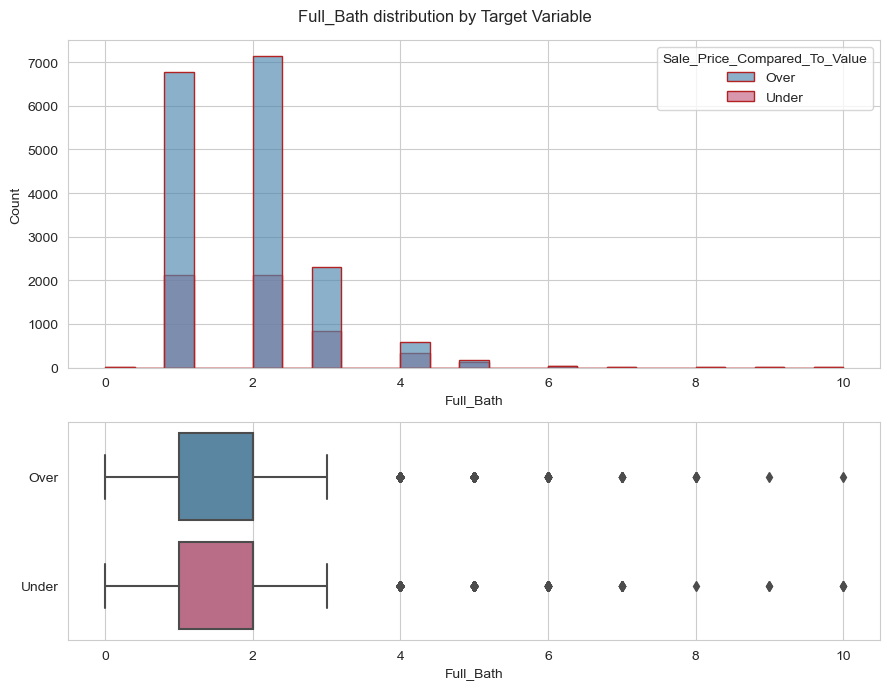

In [122]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(9, 7),gridspec_kw={'height_ratios': (.6, .4)})

sns.histplot(data=df,x="Full_Bath",hue='Sale_Price_Compared_To_Value',bins=25,alpha=0.66,edgecolor='firebrick',kde=False,ax=ax1)
sns.boxplot(x="Full_Bath", y='Sale_Price_Compared_To_Value', data=df,ax=ax2)
ax2.set_ylabel('')

ax2.set_yticklabels(['Over', 'Under'])
plt.suptitle("Full_Bath distribution by Target Variable")
plt.tight_layout()

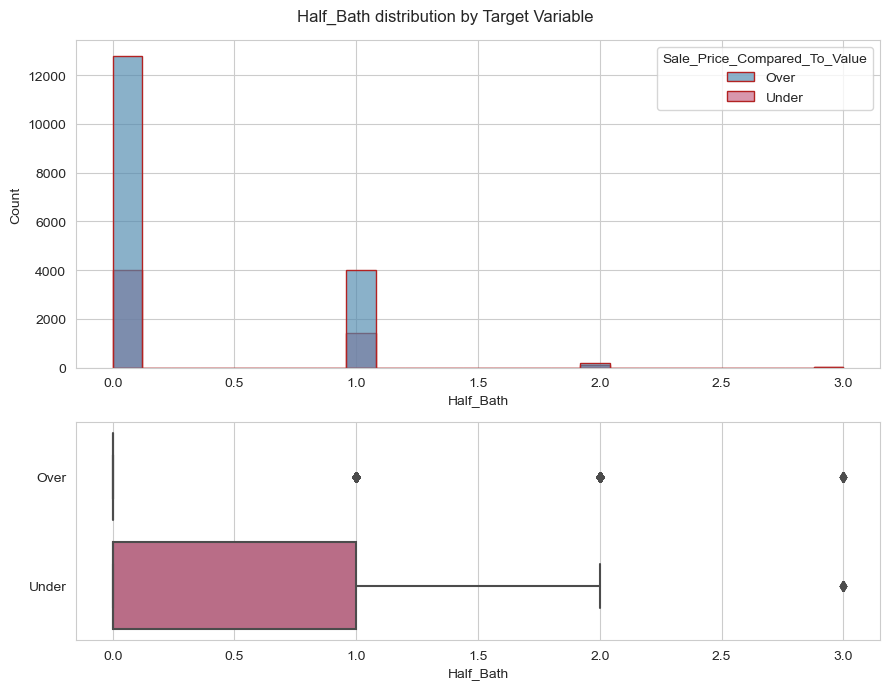

In [123]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(9, 7),gridspec_kw={'height_ratios': (.6, .4)})

sns.histplot(data=df,x="Half_Bath",hue='Sale_Price_Compared_To_Value',bins=25,alpha=0.66,edgecolor='firebrick',kde=False,ax=ax1)
sns.boxplot(x="Half_Bath", y='Sale_Price_Compared_To_Value', data=df,ax=ax2)
ax2.set_ylabel('')

ax2.set_yticklabels(['Over', 'Under'])
plt.suptitle("Half_Bath distribution by Target Variable")
plt.tight_layout()

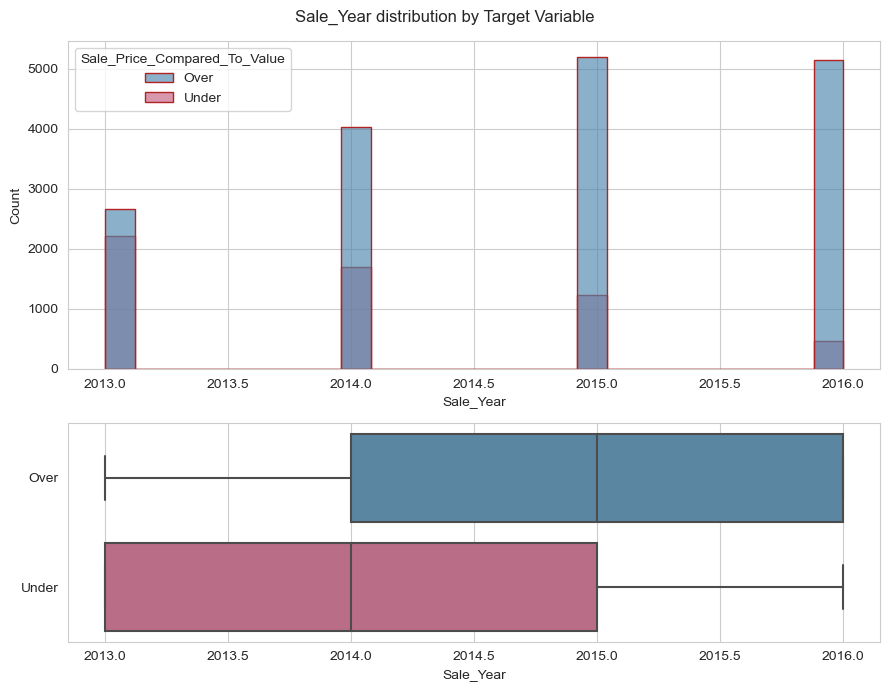

In [124]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(9, 7),gridspec_kw={'height_ratios': (.6, .4)})

sns.histplot(data=df,x="Sale_Year",hue='Sale_Price_Compared_To_Value',bins=25,alpha=0.66,edgecolor='firebrick',kde=False,ax=ax1)
sns.boxplot(x="Sale_Year", y='Sale_Price_Compared_To_Value', data=df,ax=ax2)
ax2.set_ylabel('')

ax2.set_yticklabels(['Over', 'Under'])
plt.suptitle("Sale_Year distribution by Target Variable")
plt.tight_layout()

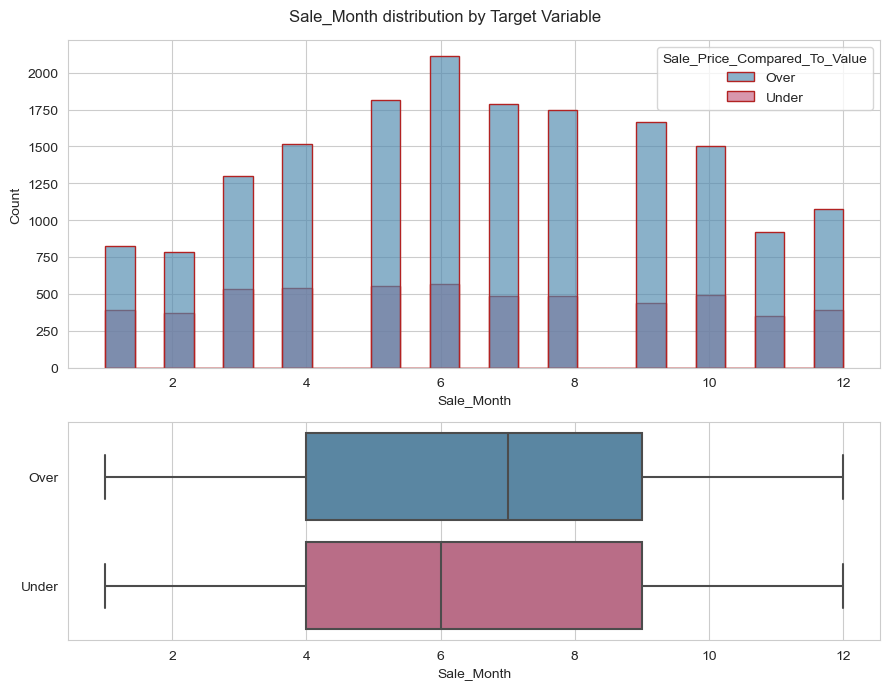

In [125]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(9, 7),gridspec_kw={'height_ratios': (.6, .4)})

sns.histplot(data=df,x="Sale_Month",hue='Sale_Price_Compared_To_Value',bins=25,alpha=0.66,edgecolor='firebrick',kde=False,ax=ax1)
sns.boxplot(x="Sale_Month", y='Sale_Price_Compared_To_Value', data=df,ax=ax2)
ax2.set_ylabel('')

ax2.set_yticklabels(['Over', 'Under'])
plt.suptitle("Sale_Month distribution by Target Variable")
plt.tight_layout()

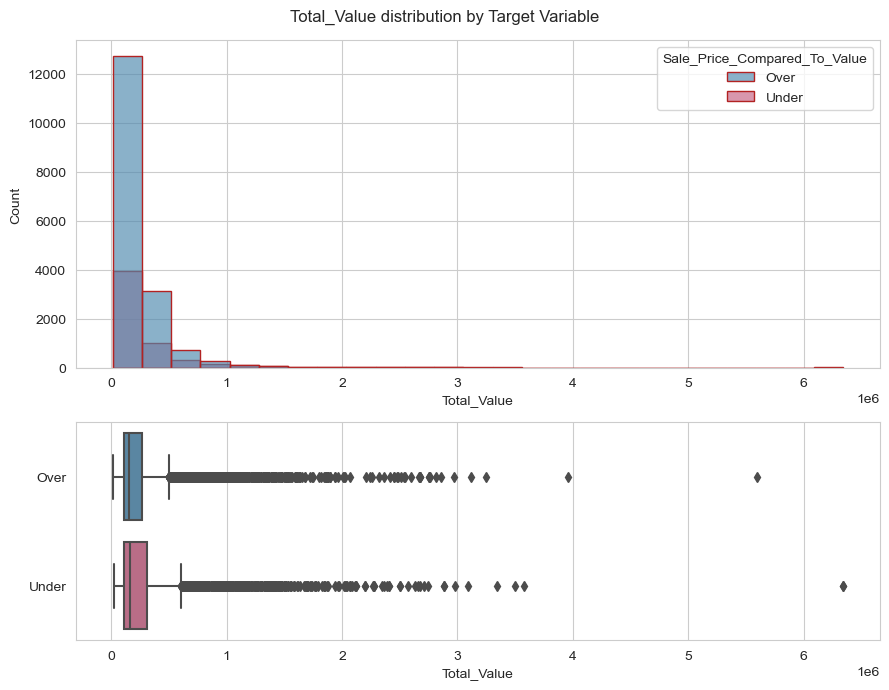

In [126]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(9, 7),gridspec_kw={'height_ratios': (.6, .4)})

sns.histplot(data=df,x="Total_Value",hue='Sale_Price_Compared_To_Value',bins=25,alpha=0.66,edgecolor='firebrick',kde=False,ax=ax1)
sns.boxplot(x="Total_Value", y='Sale_Price_Compared_To_Value', data=df,ax=ax2)
ax2.set_ylabel('')

ax2.set_yticklabels(['Over', 'Under'])
plt.suptitle("Total_Value distribution by Target Variable")
plt.tight_layout()

#### categorical

In [67]:
categ_columns=df.select_dtypes(exclude="number")
categ_columns.head()

Land_Use Sold_As_Vacant Multiple_Parcels_Involved_in_Sale       City  \
0  SINGLE FAMILY  No             No                                NASHVILLE   
1  SINGLE FAMILY  No             No                                NASHVILLE   
2  SINGLE FAMILY  No             No                                NASHVILLE   
3  SINGLE FAMILY  No             No                                NASHVILLE   
4  SINGLE FAMILY  No             No                                NASHVILLE   

              Tax_District Foundation_Type Exterior_Wall Grade  \
0  URBAN SERVICES DISTRICT  PT BSMT         BRICK         C      
1  CITY OF BERRY HILL       SLAB            BRICK/FRAME   C      
2  URBAN SERVICES DISTRICT  FULL BSMT       BRICK/FRAME   B      
3  URBAN SERVICES DISTRICT  CRAWL           FRAME         C      
4  URBAN SERVICES DISTRICT  CRAWL           FRAME         C      

  Sale_Price_Compared_To_Value  
0  Over                         
1  Over                         
2  Under                        
3  Under                        
4  Under

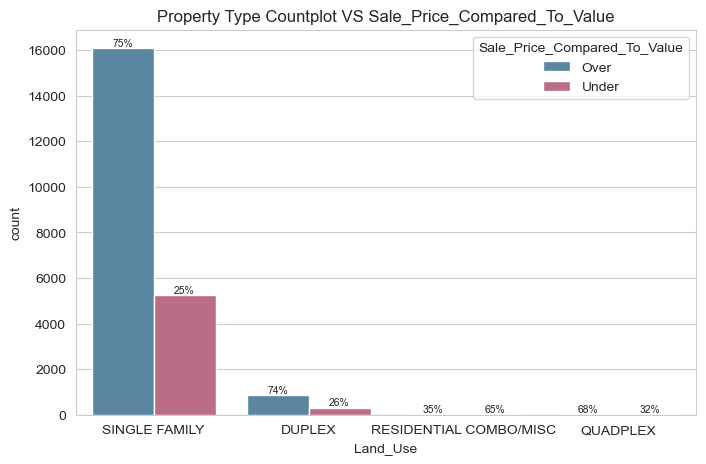

In [30]:
plt.figure(figsize=[8,5])
ax=sns.countplot(x='Land_Use',hue='Sale_Price_Compared_To_Value',data=df)
barPerc(df,'Land_Use',ax)
plt.title('Property Type Countplot VS Sale_Price_Compared_To_Value')
plt.show()

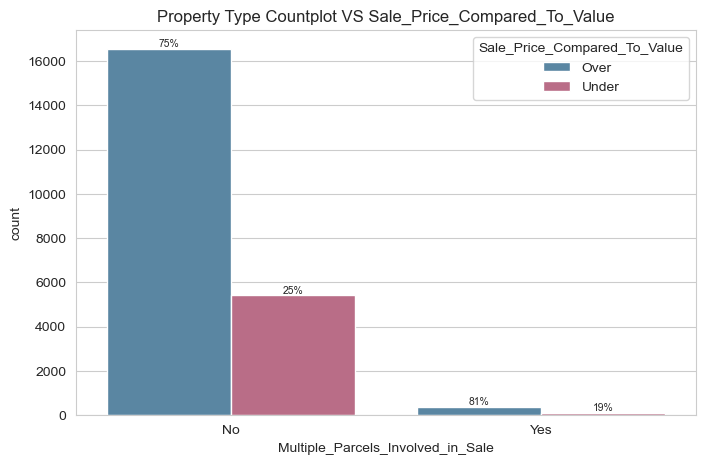

In [203]:
plt.figure(figsize=[8,5])
ax=sns.countplot(x='Multiple_Parcels_Involved_in_Sale',hue='Sale_Price_Compared_To_Value',data=df)
barPerc(df,'Multiple_Parcels_Involved_in_Sale',ax)
plt.title('Property Type Countplot VS Sale_Price_Compared_To_Value')
plt.show()

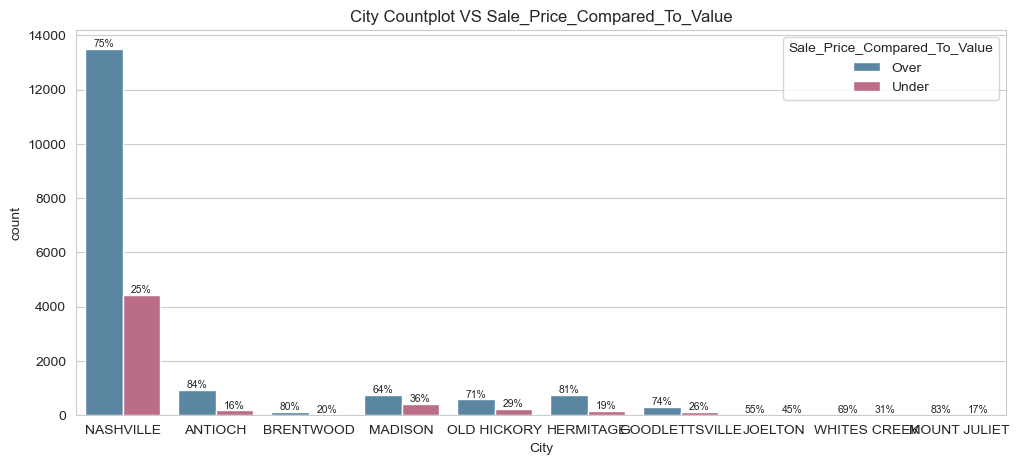

In [36]:
plt.figure(figsize=[12,5])
ax=sns.countplot(x='City',hue='Sale_Price_Compared_To_Value',data=df)
barPerc(df,'City',ax)
plt.title('City Countplot VS Sale_Price_Compared_To_Value')
plt.show()

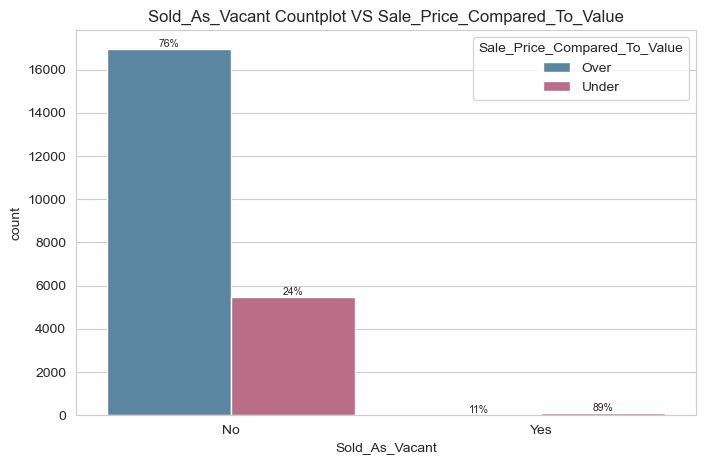

In [37]:
plt.figure(figsize=[8,5])
ax=sns.countplot(x='Sold_As_Vacant',hue='Sale_Price_Compared_To_Value',data=df)
barPerc(df,'Sold_As_Vacant',ax)
plt.title('Sold_As_Vacant Countplot VS Sale_Price_Compared_To_Value')
plt.show()

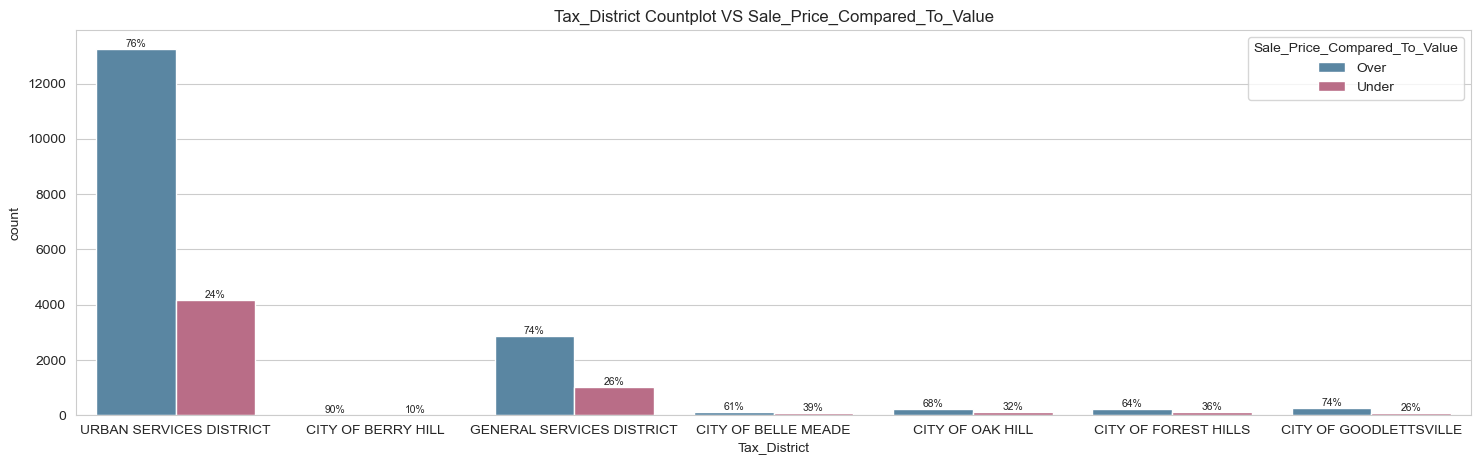

In [38]:
plt.figure(figsize=[18,5])
ax=sns.countplot(x='Tax_District',hue='Sale_Price_Compared_To_Value',data=df)
barPerc(df,'Tax_District',ax)
plt.title('Tax_District Countplot VS Sale_Price_Compared_To_Value')
plt.show()

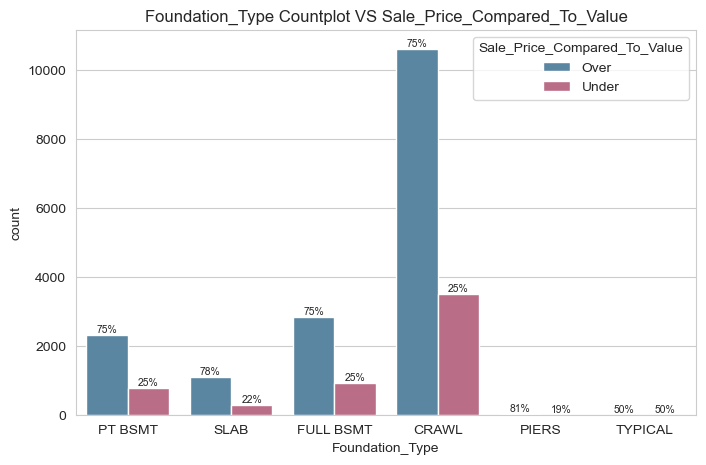

In [39]:
plt.figure(figsize=[8,5])
ax=sns.countplot(x='Foundation_Type',hue='Sale_Price_Compared_To_Value',data=df)
barPerc(df,'Foundation_Type',ax)
plt.title('Foundation_Type Countplot VS Sale_Price_Compared_To_Value')
plt.show()

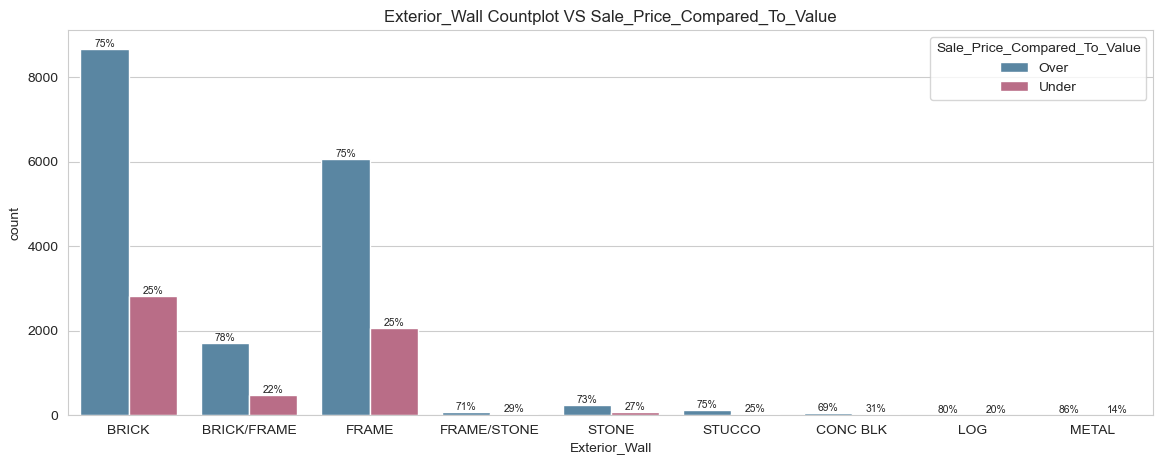

In [40]:
plt.figure(figsize=[14,5])
ax=sns.countplot(x='Exterior_Wall',hue='Sale_Price_Compared_To_Value',data=df)
barPerc(df,'Exterior_Wall',ax)
plt.title('Exterior_Wall Countplot VS Sale_Price_Compared_To_Value')
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


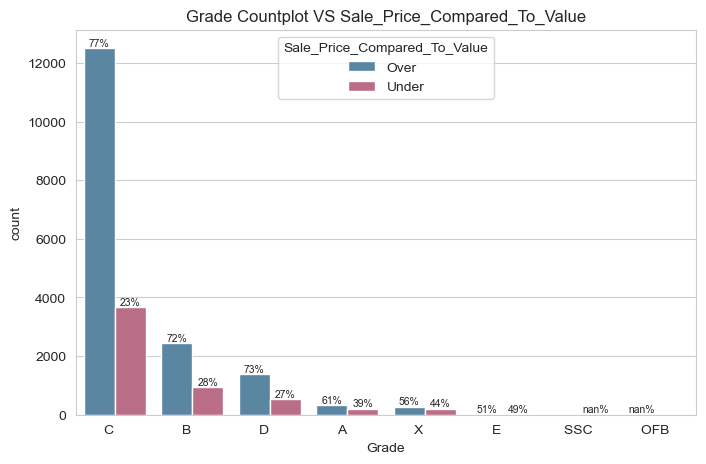

In [41]:
plt.figure(figsize=[8,5])
ax=sns.countplot(x='Grade',hue='Sale_Price_Compared_To_Value',data=df)
barPerc(df,'Grade',ax)
plt.title('Grade Countplot VS Sale_Price_Compared_To_Value')
plt.show()

## Bivariate Analysis

In [20]:
# replacing values
df['Over_Price'] = df.loc[:, 'Sale_Price_Compared_To_Value']

df['Over_Price'].replace(['Over', 'Under'],
                        [1, 0], inplace=True)

In [177]:
df.head()

Land_Use Sold_As_Vacant Multiple_Parcels_Involved_in_Sale       City  \
0  SINGLE FAMILY  No             No                                NASHVILLE   
1  SINGLE FAMILY  No             No                                NASHVILLE   
2  SINGLE FAMILY  No             No                                NASHVILLE   
3  SINGLE FAMILY  No             No                                NASHVILLE   
4  SINGLE FAMILY  No             No                                NASHVILLE   

   Acreage             Tax_District  Neighborhood  Land_Value  Building_Value  \
0  0.17     URBAN SERVICES DISTRICT  3127          32000       134400           
1  0.11     CITY OF BERRY HILL       9126          34000       157800           
2  0.17     URBAN SERVICES DISTRICT  3130          25000       243700           
3  0.34     URBAN SERVICES DISTRICT  3130          25000       138100           
4  0.17     URBAN SERVICES DISTRICT  3130          25000       86100            

   Finished_Area Foundation_Type  Year_Built Exterior_Wall Grade  Bedrooms  \
0  1149.00000     PT BSMT         1941        BRICK         C     2.0        
1  2090.82495     SLAB            2000        BRICK/FRAME   C     3.0        
2  2145.60001     FULL BSMT       1948        BRICK/FRAME   B     4.0        
3  1969.00000     CRAWL           1910        FRAME         C     2.0        
4  1037.00000     CRAWL           1945        FRAME         C     2.0        

   Full_Bath  Half_Bath Sale_Price_Compared_To_Value  Sale_Year  Sale_Month  \
0  1.0        0.0        Over                         2013       1            
1  2.0        1.0        Over                         2013       1            
2  2.0        0.0        Under                        2013       1            
3  1.0        0.0        Under                        2013       1            
4  1.0        0.0        Under                        2013       1            

   Total_Value  Over_Price  
0  166400       1           
1  191800       1           
2  268700       0           
3  163100       0           
4  111100       0

In [21]:
#create buckets for Year_Built
df['Year_Built_Bucket'] =pd.cut(df['Year_Built'],bins=[1902,1940,1960,1980,2000,2017],labels=['<=1940','1941-1960','1961-1980','1981-2000','2000-2017'])

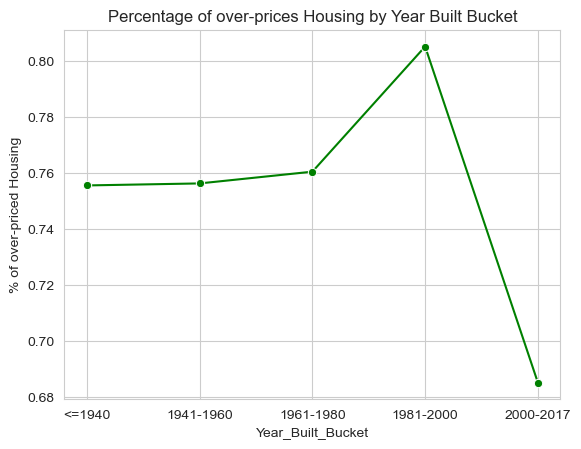

In [181]:
sns.lineplot(data=df, x="Year_Built_Bucket", y="Over_Price", ci=None, color="green", marker='o')
plt.ylabel('% of over-priced Housing')
plt.title('Percentage of over-prices Housing by Year Built Bucket')
plt.show()

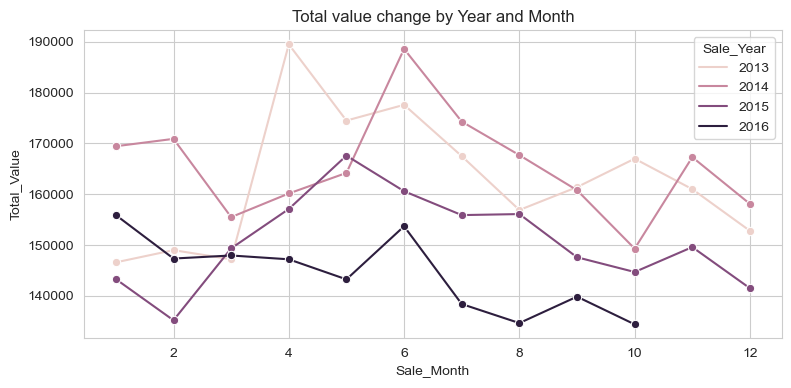

In [154]:
plt.figure(figsize=[9,4])
sns.lineplot(data=df, x="Sale_Month", y="Total_Value",hue='Sale_Year', ci=None, color="green", marker='o',estimator=np.median)
plt.title('Total value change by Year and Month')
plt.show()

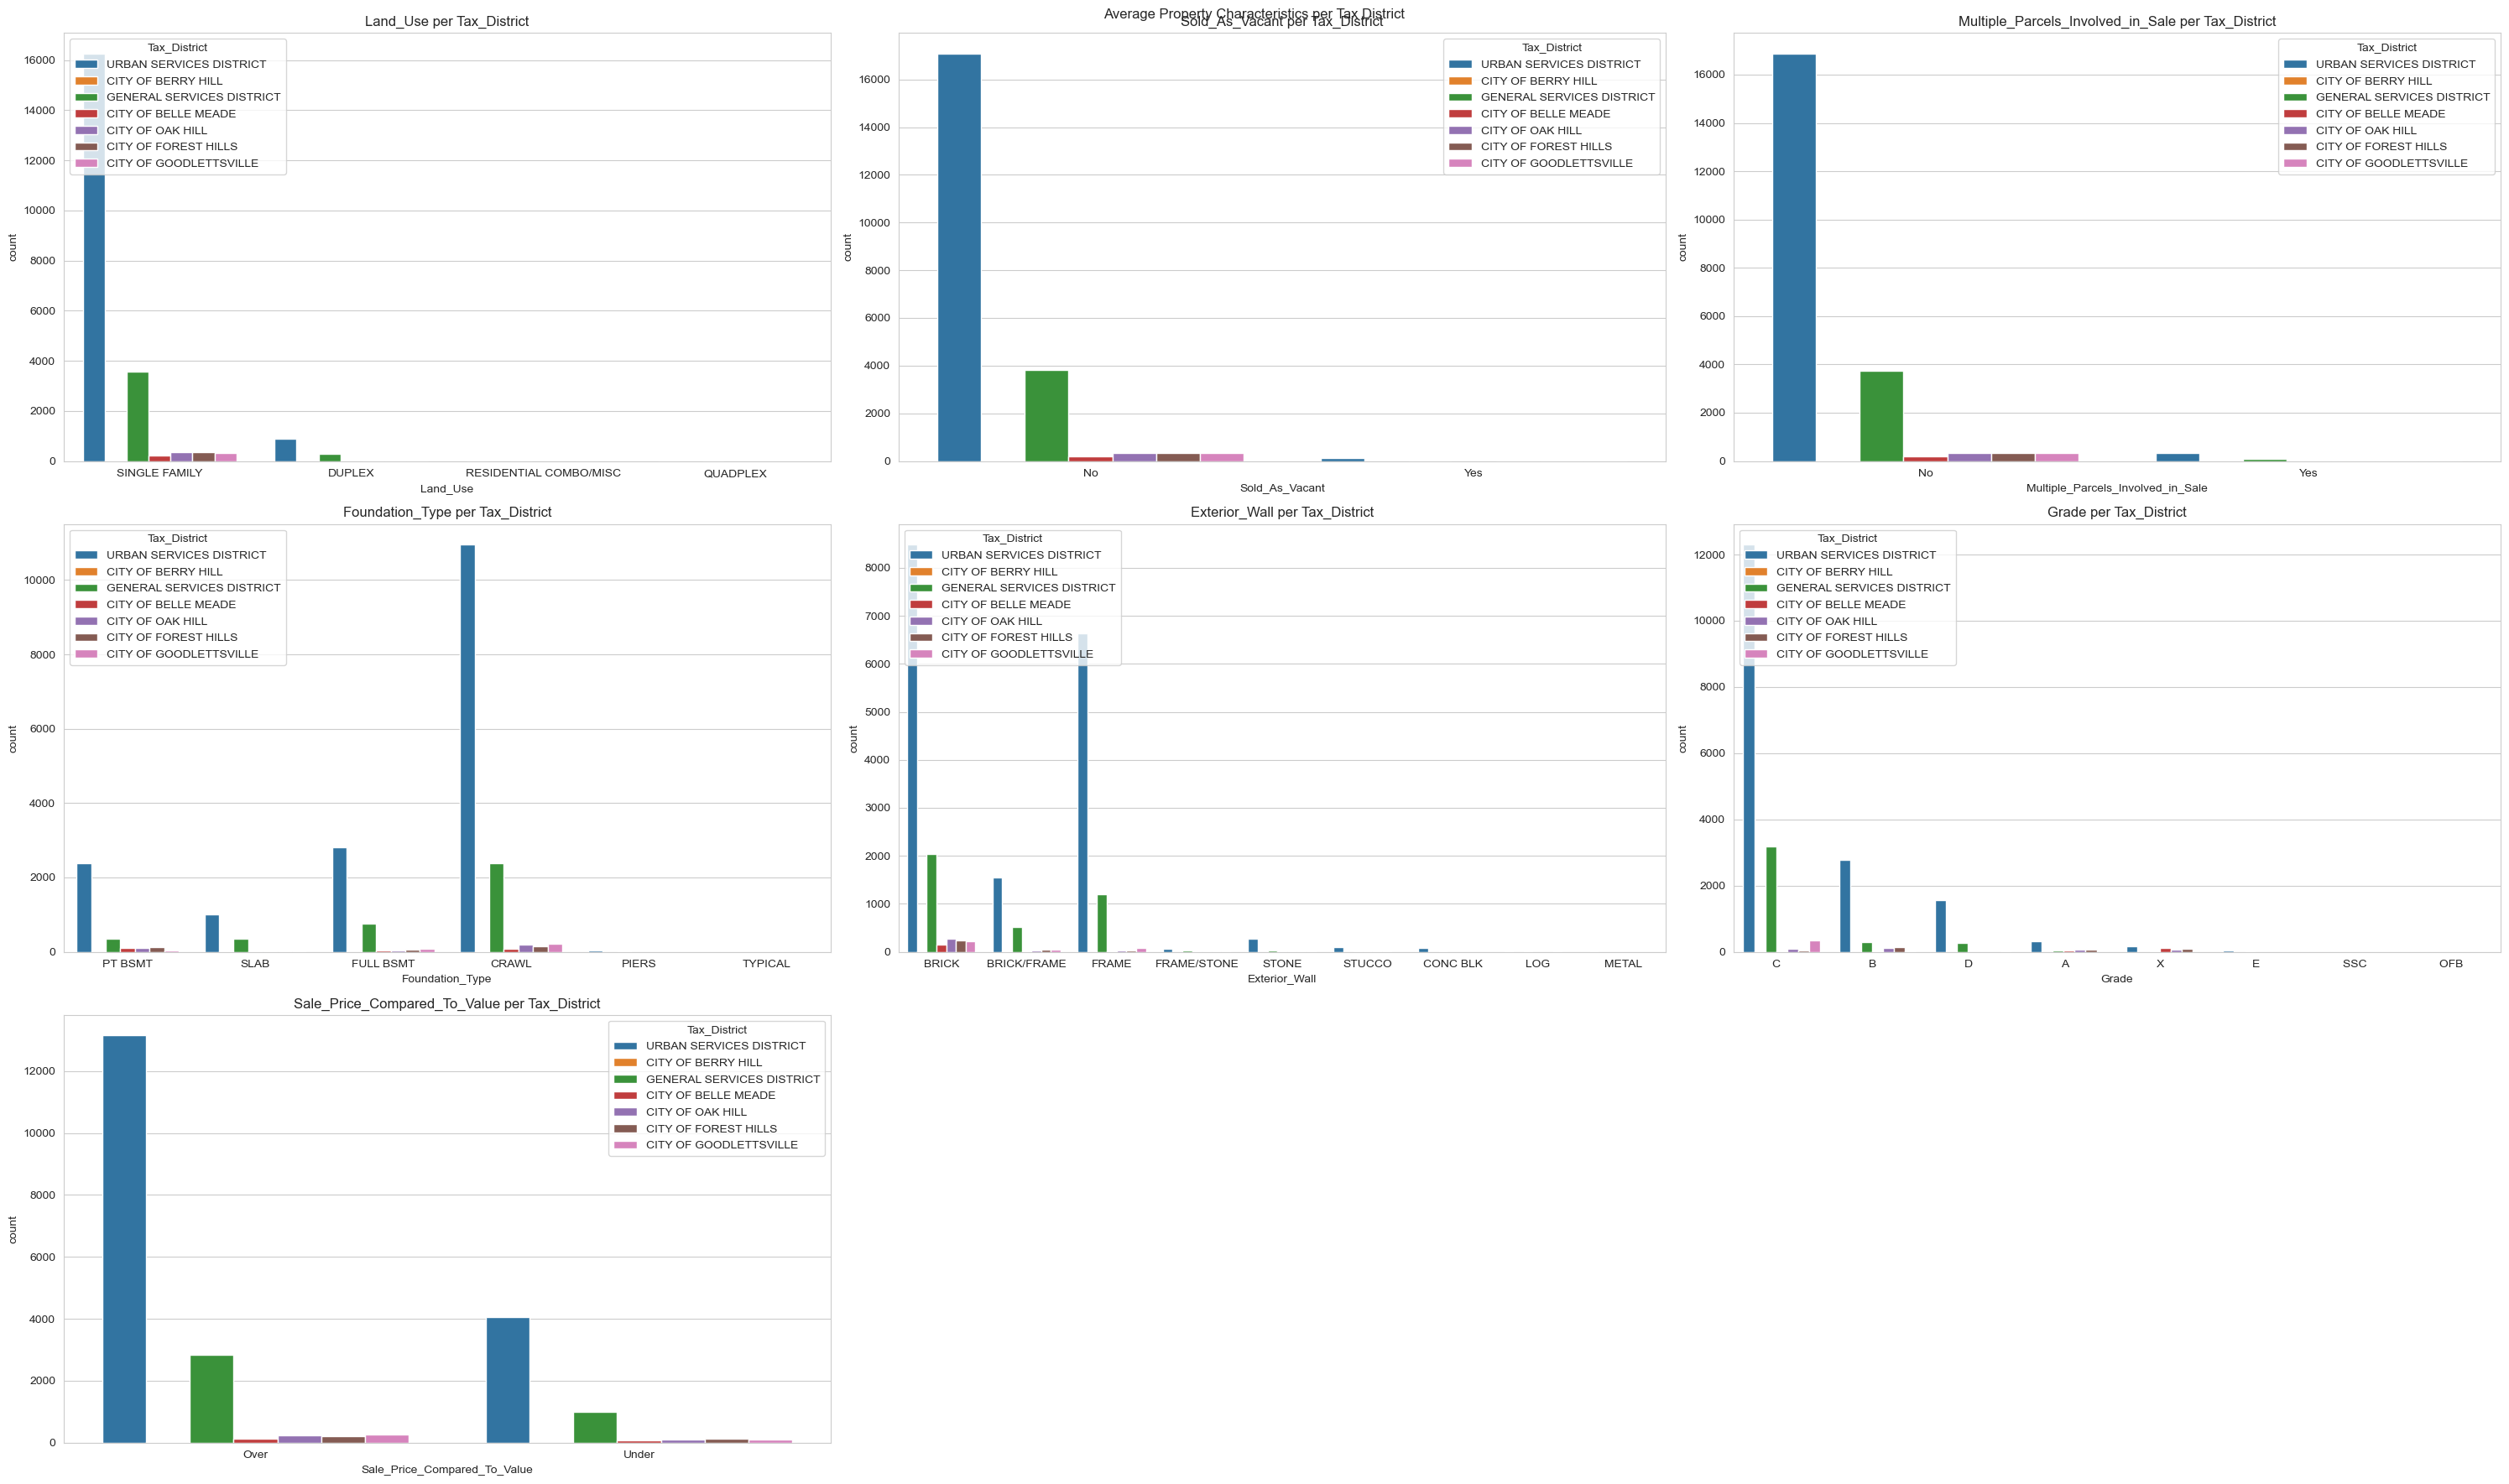

In [230]:
#Categorical Variables
fig, axs = plt.subplots(3,3,figsize=(30,18))
axs[0,0].set_title('Land_Use per Tax_District')
axs[0,1].set_title('Sold_As_Vacant per Tax_District')
axs[0,2].set_title('Multiple_Parcels_Involved_in_Sale per Tax_District')
axs[1,0].set_title('Foundation_Type per Tax_District')
axs[1,1].set_title('Exterior_Wall per Tax_District')
axs[1,2].set_title('Grade per Tax_District')
axs[2,0].set_title('Sale_Price_Compared_To_Value per Tax_District')
fig.delaxes(axs[2,1])
fig.delaxes(axs[2,2])

ax=sns.countplot(x='Land_Use',hue='Tax_District',data=df,ax=axs[0,0])
ax=sns.countplot(x='Sold_As_Vacant',hue='Tax_District',data=df, ax=axs[0,1])
ax=sns.countplot(x='Multiple_Parcels_Involved_in_Sale',hue='Tax_District',data=df, ax=axs[0,2])

ax=sns.countplot(x='Foundation_Type',hue='Tax_District',data=df, ax=axs[1,0])
ax=sns.countplot(x='Exterior_Wall',hue='Tax_District',data=df, ax=axs[1,1])
ax=sns.countplot(x='Grade',hue='Tax_District',data=df, ax=axs[1,2])

ax=sns.countplot(x='Sale_Price_Compared_To_Value',hue='Tax_District',data=df, ax=axs[2,0])

plt.suptitle("Average Property Characteristics per Tax District")
plt.tight_layout()

plt.show()

In [70]:
#housing avg acr,total value, Finished_Area, Year_Built, Bedrooms, Full_Bath, Half_Bath by Tax_District
a=df.groupby('Tax_District')['Acreage'].mean().rename('Mean').reset_index()
b=df.groupby('Tax_District')['Total_Value'].mean().rename('Mean').reset_index()
c=df.groupby('Tax_District')['Finished_Area'].mean().rename('Mean').reset_index()

d=df.groupby('Tax_District')['Full_Bath'].mean().rename('Mean').reset_index()
e=df.groupby('Tax_District')['Half_Bath'].mean().rename('Mean').reset_index()
f=df.groupby('Tax_District')['Neighborhood'].mean().rename('Mean').reset_index()
g=df.groupby('Tax_District')['Bedrooms'].mean().rename('Mean').reset_index()

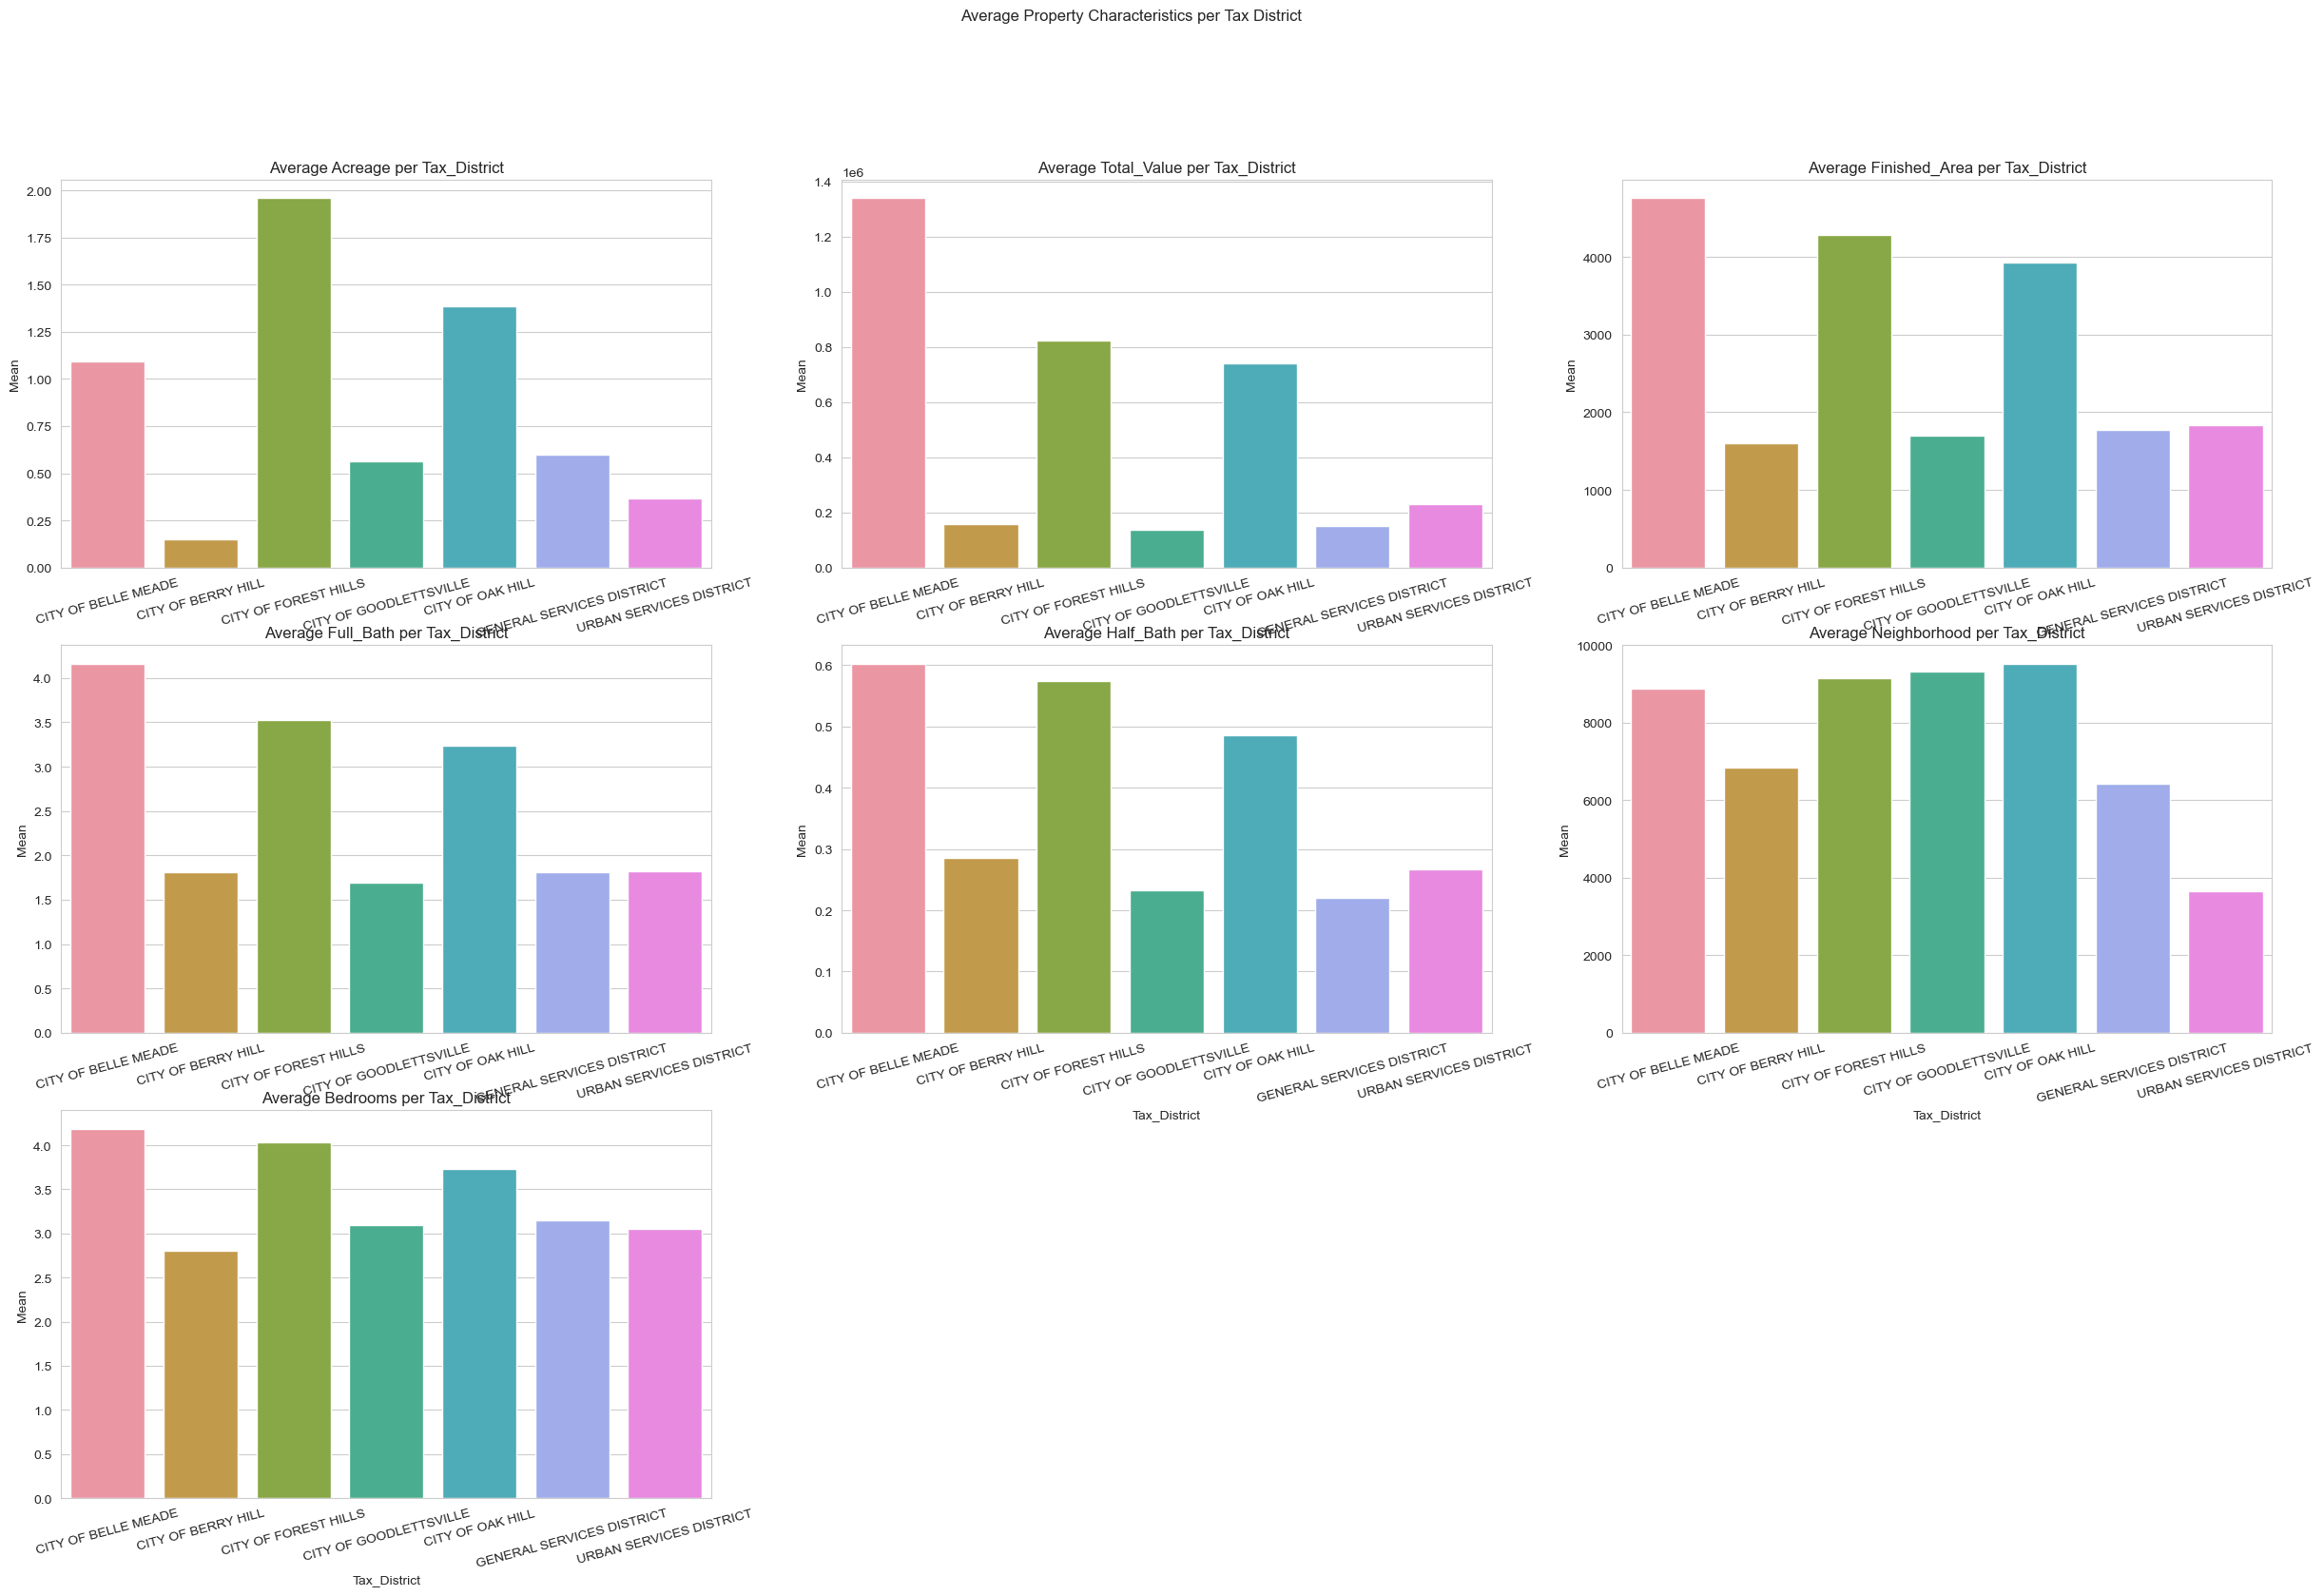

In [71]:
fig, axs = plt.subplots(3,3,figsize=(30,18))
axs[0,0].set_title('Average Acreage per Tax_District')
axs[0,0].tick_params(axis='x', rotation=15) 
axs[0,1].set_title('Average Total_Value per Tax_District')
axs[0,1].tick_params(axis='x', rotation=15) 
axs[0,2].set_title('Average Finished_Area per Tax_District')
axs[0,2].tick_params(axis='x', rotation=15) 
axs[1,0].set_title('Average Full_Bath per Tax_District')
axs[1,0].tick_params(axis='x', rotation=15) 
axs[1,1].set_title('Average Half_Bath per Tax_District')
axs[1,1].tick_params(axis='x', rotation=15) 
axs[1,2].set_title('Average Neighborhood per Tax_District')
axs[1,2].tick_params(axis='x', rotation=15) 
axs[2,0].set_title('Average Bedrooms per Tax_District')
axs[2,0].tick_params(axis='x', rotation=15) 

fig.delaxes(axs[2,1])
fig.delaxes(axs[2,2])

ax=sns.barplot(x='Tax_District',y='Mean',data=a, ax=axs[0,0])
ax=sns.barplot(x='Tax_District',y='Mean',data=b, ax=axs[0,1])
ax=sns.barplot(x='Tax_District',y='Mean',data=c, ax=axs[0,2])

ax=sns.barplot(x='Tax_District',y='Mean',data=d, ax=axs[1,0])
ax=sns.barplot(x='Tax_District',y='Mean',data=e, ax=axs[1,1])
ax=sns.barplot(x='Tax_District',y='Mean',data=f, ax=axs[1,2])

ax=sns.barplot(x='Tax_District',y='Mean',data=g, ax=axs[2,0])

plt.suptitle("Average Property Characteristics per Tax District")

plt.show()

## Correlation Analysis

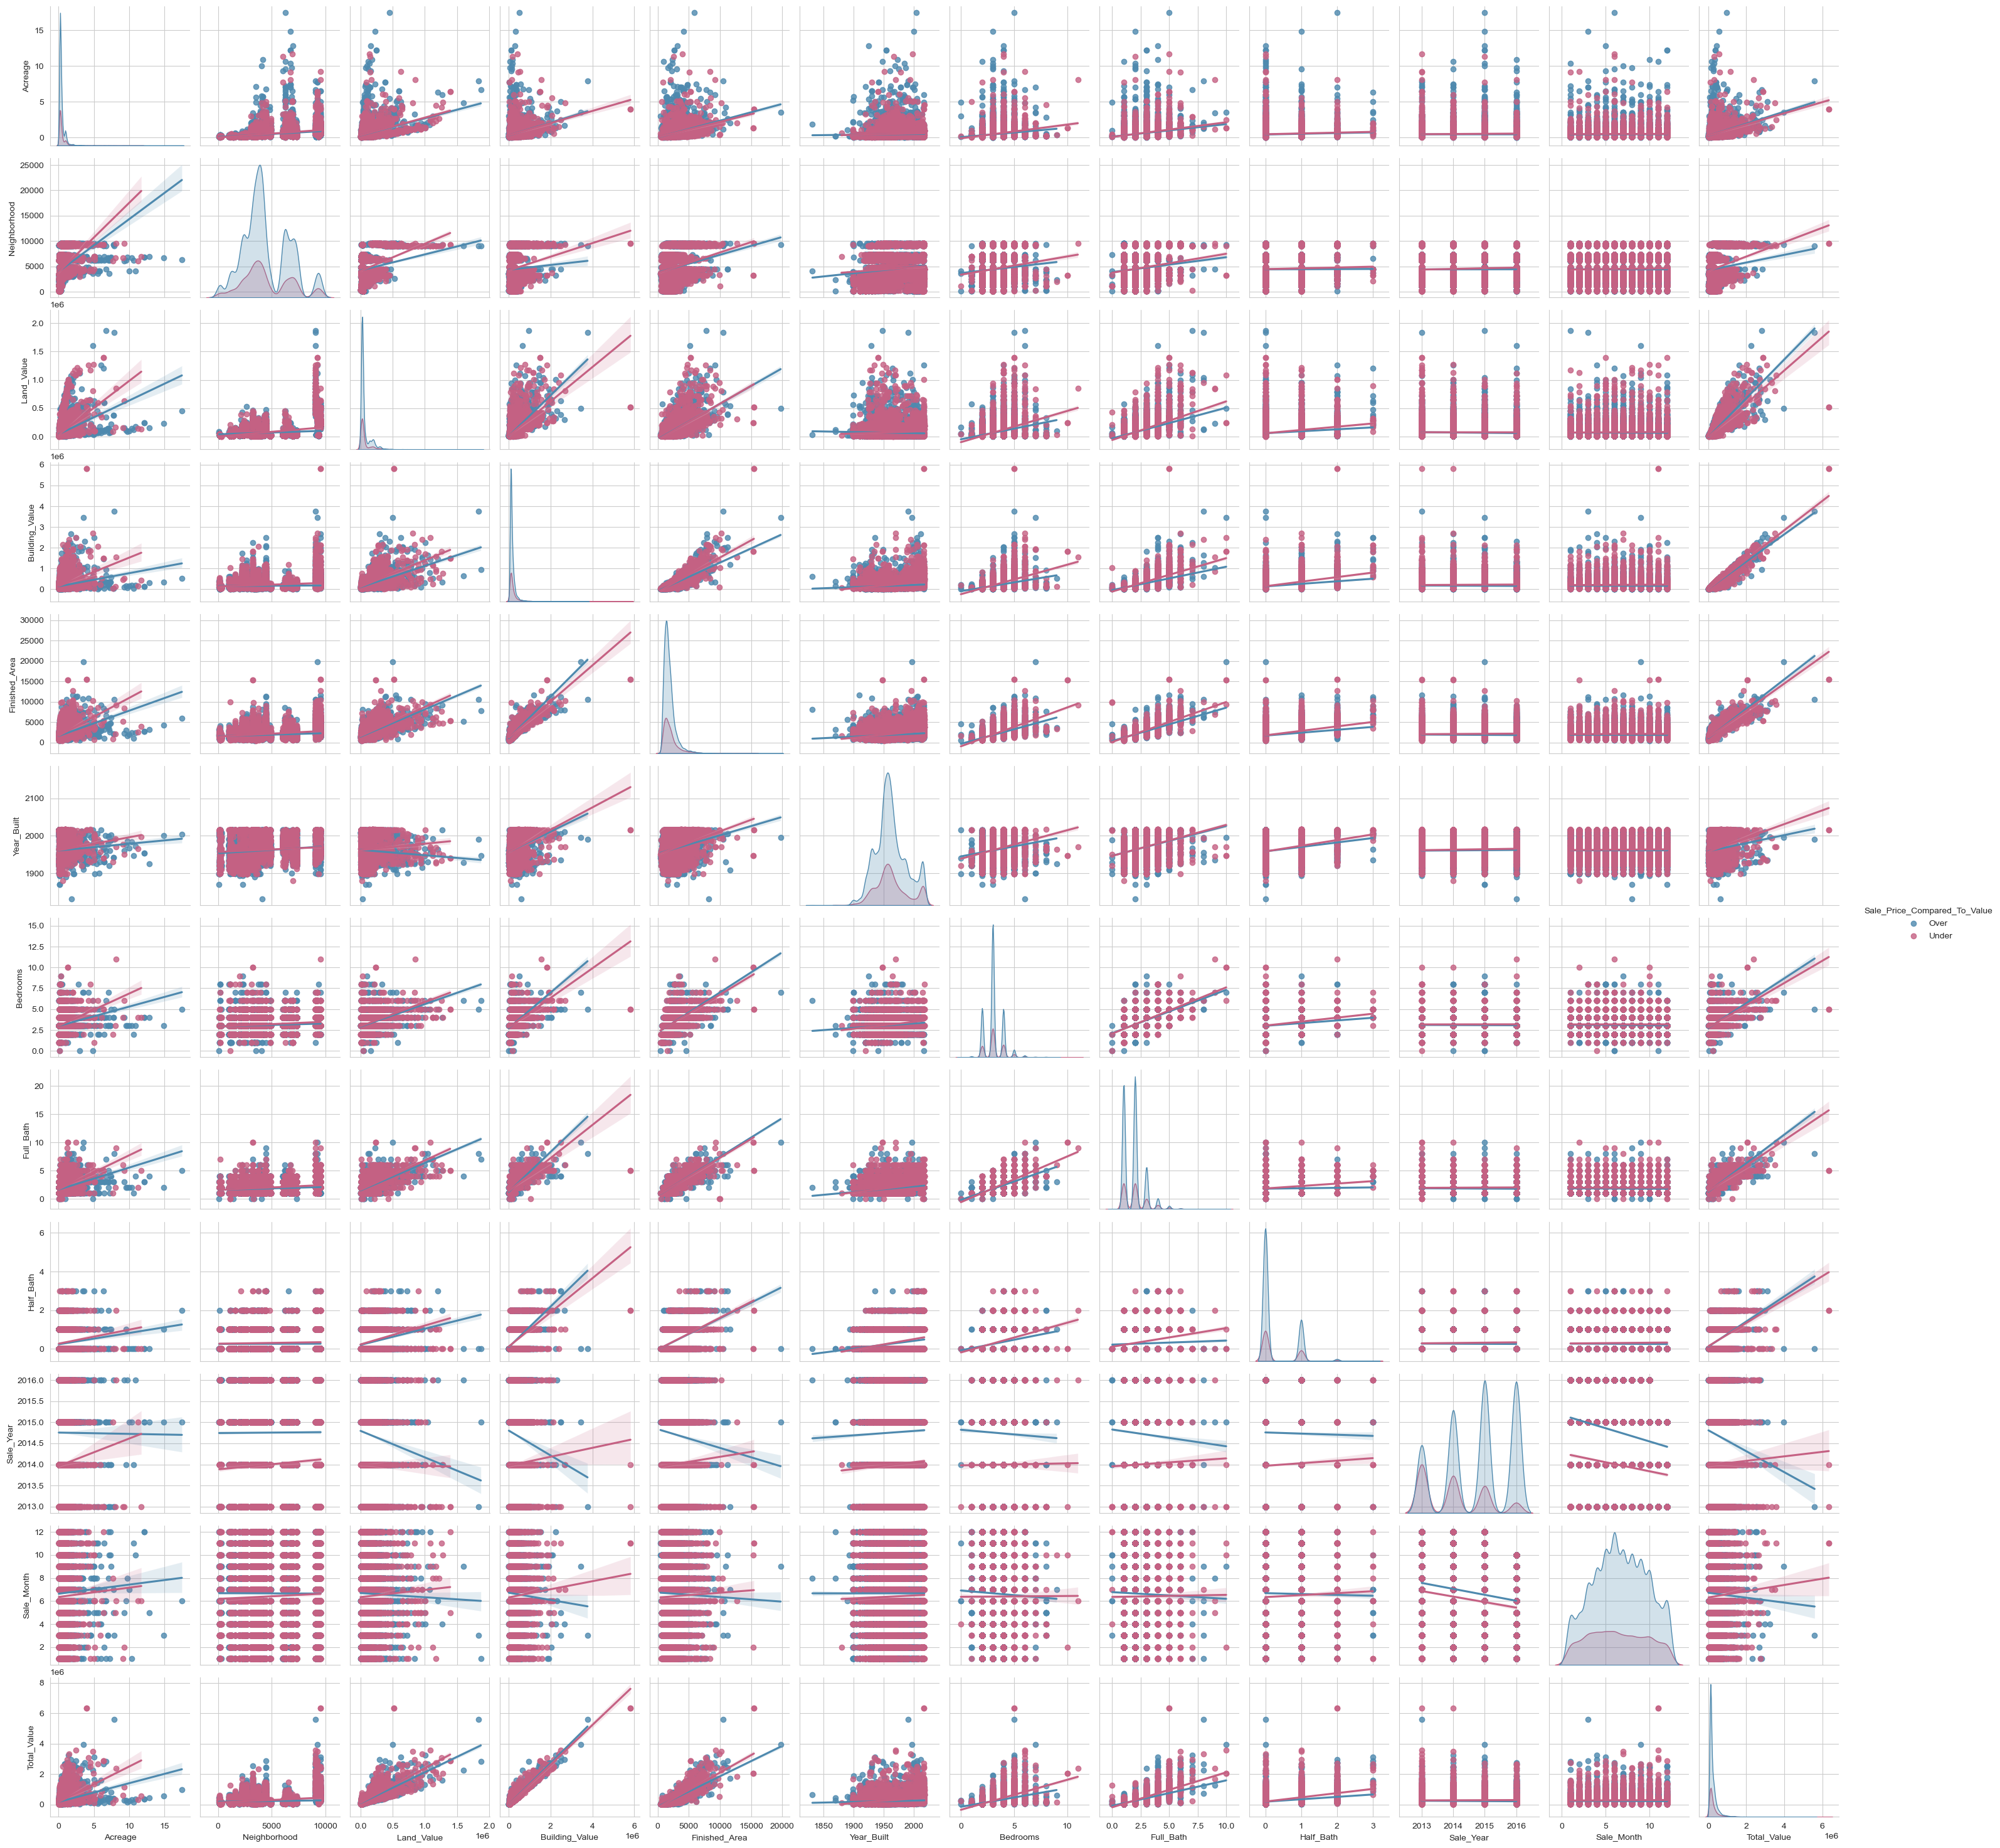

In [130]:
sns.pairplot(df,hue='Sale_Price_Compared_To_Value',kind='reg', diag_kind='kde')
plt.show()

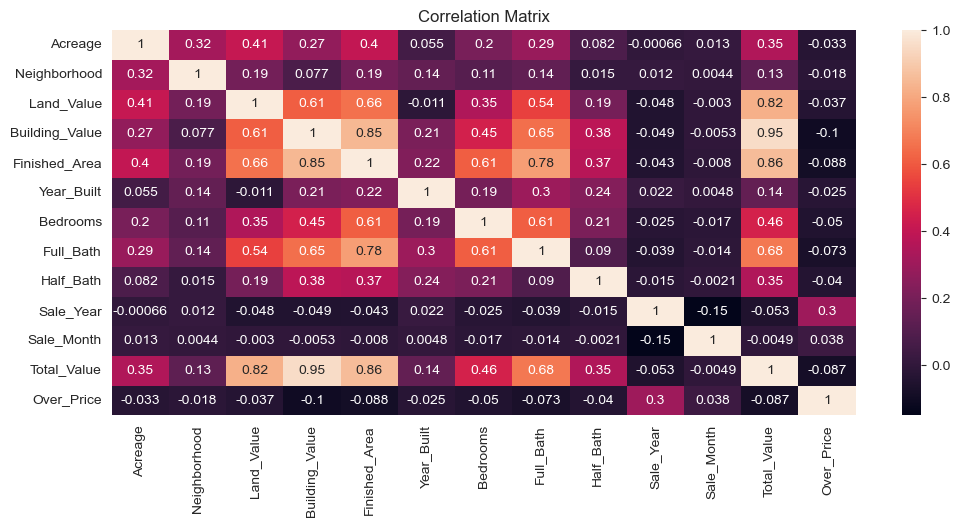

In [182]:
plt.figure(figsize=[12,5])
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
categorical = ['Land_Use', 'Sold_As_Vacant', 'Multiple_Parcels_Involved_in_Sale', 'City', 'Tax_District', 'Foundation_Type','Exterior_Wall','Grade','Year_Built_Bucket']

In [202]:
from scipy.stats import chi2_contingency

chi2_array, p_array = [], []
for column in categorical:

    crosstab = pd.crosstab(df[column], df['Over_Price'])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    chi2_array.append(chi2)
    p_array.append(p)

df_chi = pd.DataFrame({
    'Variable': categorical,
    'Chi-square': chi2_array,
    'p-value': p_array
})
df_chi.sort_values(by='Chi-square', ascending=False)

Variable  Chi-square       p-value
1  Sold_As_Vacant                     282.239404  2.441170e-63
7  Grade                              242.120029  1.315879e-48
3  City                               151.844933  3.657285e-28
8  Year_Built_Bucket                  98.554672   1.997548e-20
4  Tax_District                       72.889110   1.043249e-13
0  Land_Use                           35.661246   8.830804e-08
6  Exterior_Wall                      12.096044   1.469698e-01
5  Foundation_Type                    10.014995   7.481149e-02
2  Multiple_Parcels_Involved_in_Sale  6.409013    1.135425e-02

In [183]:
continuous_data=df.select_dtypes(include='number')
continuous_data.head()

Acreage  Neighborhood  Land_Value  Building_Value  Finished_Area  \
0  0.17     3127          32000       134400          1149.00000      
1  0.11     9126          34000       157800          2090.82495      
2  0.17     3130          25000       243700          2145.60001      
3  0.34     3130          25000       138100          1969.00000      
4  0.17     3130          25000       86100           1037.00000      

   Year_Built  Bedrooms  Full_Bath  Half_Bath  Sale_Year  Sale_Month  \
0  1941        2.0       1.0        0.0        2013       1            
1  2000        3.0       2.0        1.0        2013       1            
2  1948        4.0       2.0        0.0        2013       1            
3  1910        2.0       1.0        0.0        2013       1            
4  1945        2.0       1.0        0.0        2013       1            

   Total_Value  Over_Price  
0  166400       1           
1  191800       1           
2  268700       0           
3  163100       0           
4  111100       0

In [201]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF             = pd.DataFrame()
VIF['feature']  = continuous_data.columns
VIF['VIF']      = [variance_inflation_factor(continuous_data.values, i) for i in range(continuous_data.shape[1])]
# take a look
VIF

c:\Users\seagu\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


feature          VIF
0   Acreage         2.134502   
1   Neighborhood    6.202157   
2   Land_Value      inf        
3   Building_Value  inf        
4   Finished_Area   28.826481  
5   Year_Built      7369.995484
6   Bedrooms        27.079607  
7   Full_Bath       16.785590  
8   Half_Bath       1.903821   
9   Sale_Year       7208.078188
10  Sale_Month      5.630645   
11  Total_Value     inf        
12  Over_Price      4.135086

# Modeling

#### Load Packages

In [22]:
import sklearn
import warnings
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import RFE

from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

In [23]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, plot_confusion_matrix, recall_score, precision_score, auc, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import classification_report
import scikitplot as skplt

### Data Processing

In [24]:
#Feature Selection: EDA revealed several more features that can be dropped as they do not provide any value in predicting our target variable:
#The 'Neighborhoods' and 'FullBath' are similar in 'over and under' and are deemed redundant.
#the categorical variable: Exterior_wall,Foundation_Type,and Multiple_Parcels_Involved_in_Sale  have samll chi-square and p-value greater than 0.05,  (the standard cut-off value), confirming our initial hypothesis that these two features do not convey any useful information.
data=df.drop(['Foundation_Type','Multiple_Parcels_Involved_in_Sale','Neighborhood',"Full_Bath",'Exterior_Wall','Year_Built','Sale_Price_Compared_To_Value','Land_Value'],axis=1)
data.head()

Land_Use Sold_As_Vacant       City  Acreage             Tax_District  \
0  SINGLE FAMILY  No             NASHVILLE  0.17     URBAN SERVICES DISTRICT   
1  SINGLE FAMILY  No             NASHVILLE  0.11     CITY OF BERRY HILL        
2  SINGLE FAMILY  No             NASHVILLE  0.17     URBAN SERVICES DISTRICT   
3  SINGLE FAMILY  No             NASHVILLE  0.34     URBAN SERVICES DISTRICT   
4  SINGLE FAMILY  No             NASHVILLE  0.17     URBAN SERVICES DISTRICT   

   Building_Value  Finished_Area Grade  Bedrooms  Half_Bath  Sale_Year  \
0  134400          1149.00000     C     2.0       0.0        2013        
1  157800          2090.82495     C     3.0       1.0        2013        
2  243700          2145.60001     B     4.0       0.0        2013        
3  138100          1969.00000     C     2.0       0.0        2013        
4  86100           1037.00000     C     2.0       0.0        2013        

   Sale_Month  Total_Value  Over_Price Year_Built_Bucket  
0  1           166400       1           1941-1960         
1  1           191800       1           1981-2000         
2  1           268700       0           1941-1960         
3  1           163100       0           <=1940            
4  1           111100       0           1941-1960

In [25]:
X = data.drop('Over_Price', axis = 1)
y = data['Over_Price'] 

In [28]:
numeric_features = ["Acreage",'Building_Value','Finished_Area','Bedrooms','Half_Bath','Total_Value']
numeric_transformer = Pipeline(steps=[
     ('imputer', SimpleImputer(strategy='median')),
     ("scaler", StandardScaler())]
)

categorical_features = ["Land_Use", "Sold_As_Vacant",'City','Tax_District','Grade','Sale_Year','Sale_Month','Year_Built_Bucket']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)])

In [29]:
X_prepared=preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2, random_state=42)

In [30]:
from imblearn.combine import SMOTETomek
#Use Synthetic Minority Oversampling TEchnique to deal with imbalanced dataset

smk = SMOTETomek()
# Oversample training  data
X_train, y_train = smk.fit_resample(X_train, y_train)
print(X_train.shape, y_train.shape)
# Oversample validation data
X_test, y_test = smk.fit_resample(X_test, y_test)
print(X_test.shape, y_test.shape)

(25882, 59) (25882,)
(6530, 59) (6530,)


In [31]:
def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [name + "__" + f for f in column]

        return [name + "__" + f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == sklearn.pipeline.Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        if type(trans) == sklearn.pipeline.Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [name + "__" + f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names

In [32]:
get_feature_names(preprocessor)

C:\Users\seagu\AppData\Local\Temp\ipykernel_22756\1809191144.py:30: UserWarning: Transformer imputer (type SimpleImputer) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
C:\Users\seagu\AppData\Local\Temp\ipykernel_22756\1809191144.py:30: UserWarning: Transformer scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "


['num__Acreage',
 'num__Building_Value',
 'num__Finished_Area',
 'num__Bedrooms',
 'num__Half_Bath',
 'num__Total_Value',
 'onehot__x0_DUPLEX',
 'onehot__x0_QUADPLEX',
 'onehot__x0_RESIDENTIAL COMBO/MISC',
 'onehot__x0_SINGLE FAMILY',
 'onehot__x1_No',
 'onehot__x1_Yes',
 'onehot__x2_ANTIOCH',
 'onehot__x2_BRENTWOOD',
 'onehot__x2_GOODLETTSVILLE',
 'onehot__x2_HERMITAGE',
 'onehot__x2_JOELTON',
 'onehot__x2_MADISON',
 'onehot__x2_MOUNT JULIET',
 'onehot__x2_NASHVILLE',
 'onehot__x2_OLD HICKORY',
 'onehot__x2_WHITES CREEK',
 'onehot__x3_CITY OF BELLE MEADE',
 'onehot__x3_CITY OF BERRY HILL',
 'onehot__x3_CITY OF FOREST HILLS',
 'onehot__x3_CITY OF GOODLETTSVILLE',
 'onehot__x3_CITY OF OAK HILL',
 'onehot__x3_GENERAL SERVICES DISTRICT',
 'onehot__x3_URBAN SERVICES DISTRICT',
 'onehot__x4_A   ',
 'onehot__x4_B   ',
 'onehot__x4_C   ',
 'onehot__x4_D   ',
 'onehot__x4_E   ',
 'onehot__x4_OFB ',
 'onehot__x4_SSC ',
 'onehot__x4_X   ',
 'onehot__x5_2013',
 'onehot__x5_2014',
 'onehot__x5_201

## implement Models

### Logistic Regression Models

In [224]:
lr = LogisticRegression()
lr= lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

c:\Users\seagu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [225]:
# print prediction results
print('Model accuracy score with default hyperparameters on test set: {0:0.4f}'. format(accuracy_score(y_test, y_pred_lr)))
print('Model accuracy score with default hyperparameters on train set: {0:0.4f}'. format(lr.score(X_train,y_train)))

print('Training error =', 100*(1-lr.score(X_train,y_train)), '%')
print('Testing error', 100*(1-lr.score(X_test,y_test)), '%')

print('F1 Score: ',f1_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred_lr)))

Model accuracy score with default hyperparameters on test set: 0.6863
Model accuracy score with default hyperparameters on train set: 0.6999
Training error = 30.008475882262285 %
Testing error 31.368356750152714 %
F1 Score:  0.679763018397256
              precision    recall  f1-score   support

           0       0.68      0.71      0.69      3274
           1       0.69      0.67      0.68      3274

    accuracy                           0.69      6548
   macro avg       0.69      0.69      0.69      6548
weighted avg       0.69      0.69      0.69      6548

Confusion Matrix : 
[[2314  960]
 [1094 2180]]


In [37]:
from sklearn.model_selection import GridSearchCV
#Grid Search for logistic regression
log_reg_params= {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
log_reg_grid = GridSearchCV(estimator=LogisticRegression(random_state=42), param_grid=log_reg_params, cv=10,scoring = "recall")
log_reg_grid.fit(X_train, y_train)

c:\Users\seagu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\seagu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
                         'penalty': ['l1', 'l2']},
             scoring='recall')

In [38]:
print(f'Logistic Regression:\n\t *best params: {log_reg_grid.best_params_}\n\t *best score: {log_reg_grid.best_score_}')

Logistic Regression:
	 *best params: {'C': 25, 'penalty': 'l2'}
	 *best score: 0.676841257243112


In [85]:
#### Using Optimal values of Hyperparameters
best_log_reg = LogisticRegression(C=25,penalty='l2')
best_log_reg.fit(X_train, y_train)
log_reg_predicted = best_log_reg.predict(X_test)

# calculating the probabilities
y_pred_proba = best_log_reg.predict_proba(X_test)

c:\Users\seagu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [86]:
print('Logistic Regression Model accuracy score with grid search on test set: {0:0.4f}'. format(accuracy_score(y_test, log_reg_predicted)))
print('Logistic Regression Model accuracy score with grid search on train set: {0:0.4f}'. format(best_log_reg.score(X_train,y_train)))

print('Logistic Regression Model Training error =', 100*(1-best_log_reg.score(X_train,y_train)), '%')
print('Logistic Regression Model Testing error', 100*(1-best_log_reg.score(X_test,y_test)), '%')

print('Logistic Regression Model F1 Score: ',f1_score(y_test, log_reg_predicted))
print(classification_report(y_test, log_reg_predicted))

Logistic Regression Model accuracy score with grid search on test set: 0.6922
Logistic Regression Model accuracy score with grid search on train set: 0.6993
Logistic Regression Model Training error = 30.074955567575923 %
Logistic Regression Model Testing error 30.781010719754974 %
Logistic Regression Model F1 Score:  0.6838628499528153
              precision    recall  f1-score   support

           0       0.68      0.72      0.70      3265
           1       0.70      0.67      0.68      3265

    accuracy                           0.69      6530
   macro avg       0.69      0.69      0.69      6530
weighted avg       0.69      0.69      0.69      6530



In [87]:
# calculating the probabilities
y_pred_prob = best_log_reg.predict_proba(X_test)[:,1]

# instantiating the roc_cruve
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

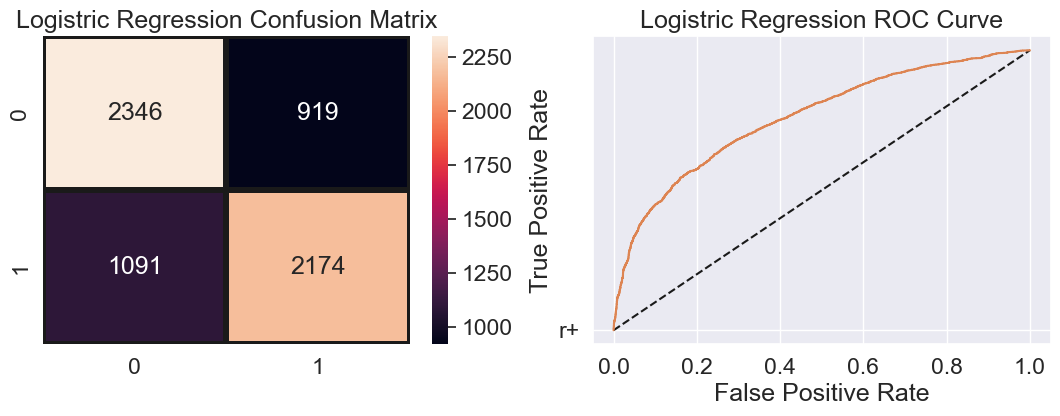

In [88]:
fig, axs = plt.subplots(ncols=2,figsize=(13,4))
axs[0].set_title("Logistric Regression Confusion Matrix")

axs[1].set_title("Logistric Regression ROC Curve")
axs[1].set_ylabel("True Positive Rate")
axs[1].set_xlabel("False Positive Rate")


ax=sns.heatmap(confusion_matrix(y_test, log_reg_predicted),
                annot=True,fmt = "d",linecolor="k",linewidths=3, ax=axs[0])

ax=plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='Logistic Regression')

plt.show()

In [89]:
coef_tans=best_log_reg.coef_.transpose()
coef = [i[0] for i in coef_tans]

feat_importances = pd.DataFrame({"Feature_Name":get_feature_names(preprocessor),"coef":coef})
feat_importances = feat_importances[['Feature_Name','coef']]# reorder the columns
feat_importances['importances'] = np.abs( feat_importances['coef'] )
feat_importances.sort_values(by="importances",inplace=True,ascending=False)

C:\Users\seagu\AppData\Local\Temp\ipykernel_22756\1809191144.py:30: UserWarning: Transformer imputer (type SimpleImputer) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
C:\Users\seagu\AppData\Local\Temp\ipykernel_22756\1809191144.py:30: UserWarning: Transformer scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "


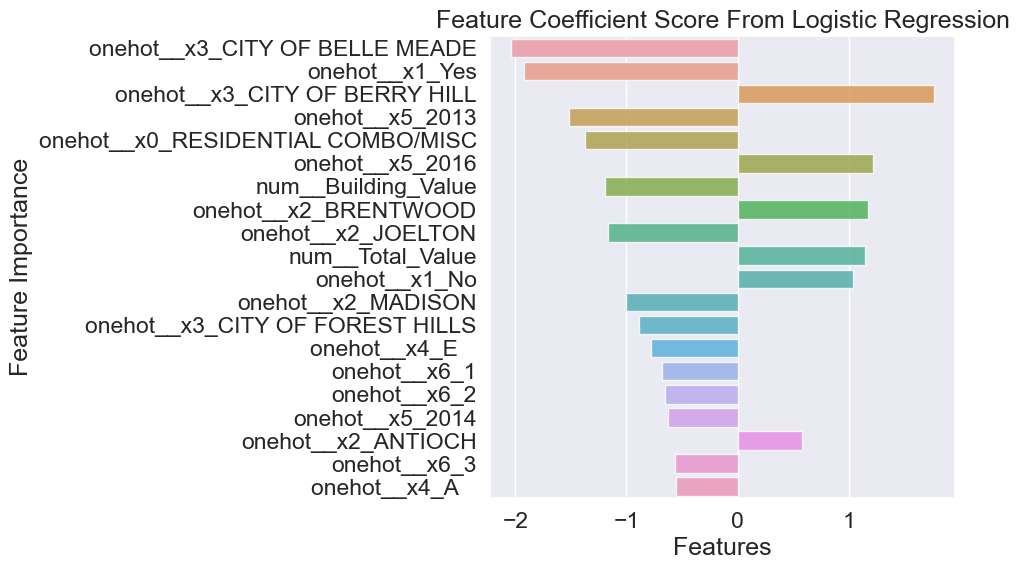

In [90]:
sns.set(font_scale=1.5)
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(6,6))
sns.barplot(feat_importances[0:20].coef,feat_importances[0:20].Feature_Name,alpha=0.8)
plt.title('Feature Coefficient Score From Logistic Regression')
plt.ylabel('Feature Importance')
plt.xlabel('Features')
plt.show()

### Decision Tree

In [33]:
dtc = DecisionTreeClassifier()

#Grid Search for Decision Tree
params = {'max_depth': [2, 3, 5, 10, 20],'min_samples_leaf': [5, 10, 20, 50, 100],'criterion': ["gini", "entropy"]}

#we care more about recall rate in our model, since FN can cause the real estate loss money, but FP just lost an investment opportunity 
DT_Classfier_grid = GridSearchCV(estimator=dtc, param_grid=params,cv=4, n_jobs=-1, verbose=1, scoring = "recall")
DT_Classfier_grid.fit(X_train, y_train)


Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='recall', verbose=1)

In [34]:
print(f'Decision Tree:\n\t *best params: {DT_Classfier_grid.best_params_}\n\t *best score: {DT_Classfier_grid.best_score_}')

Decision Tree:
	 *best params: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 5}
	 *best score: 0.7293961814822811


In [43]:
#### Using Optimal values of Hyperparameters
best_dtc = DecisionTreeClassifier(max_depth=2,min_samples_leaf=5,criterion='entropy')
best_dtc.fit(X_train, y_train)
best_dtc_predicted = best_dtc.predict(X_test)

In [44]:
print('Decision Tree Model accuracy score with grid search on test set: {0:0.4f}'. format(accuracy_score(y_test, best_dtc_predicted)))
print('Decision Tree Model accuracy score with grid search on train set: {0:0.4f}'. format(best_dtc.score(X_train,y_train)))

print('Decision Tree Model Training error =', 100*(1-best_dtc.score(X_train,y_train)), '%')
print('Decision Tree Model Testing error', 100*(1-best_dtc.score(X_test,y_test)), '%')

print('Decision Tree Model F1 Score: ',f1_score(y_test, best_dtc_predicted))
print(classification_report(y_test, best_dtc_predicted))

Decision Tree Model accuracy score with grid search on test set: 0.6879
Decision Tree Model accuracy score with grid search on train set: 0.6845
Decision Tree Model Training error = 31.55474847384282 %
Decision Tree Model Testing error 31.209800918836137 %
Decision Tree Model F1 Score:  0.6579389056730447
              precision    recall  f1-score   support

           0       0.66      0.78      0.71      3265
           1       0.73      0.60      0.66      3265

    accuracy                           0.69      6530
   macro avg       0.69      0.69      0.69      6530
weighted avg       0.69      0.69      0.69      6530



In [45]:
col_name=get_feature_names(preprocessor)
col_name

C:\Users\seagu\AppData\Local\Temp\ipykernel_22756\1809191144.py:30: UserWarning: Transformer imputer (type SimpleImputer) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
C:\Users\seagu\AppData\Local\Temp\ipykernel_22756\1809191144.py:30: UserWarning: Transformer scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "


['num__Acreage',
 'num__Building_Value',
 'num__Finished_Area',
 'num__Bedrooms',
 'num__Half_Bath',
 'num__Total_Value',
 'onehot__x0_DUPLEX',
 'onehot__x0_QUADPLEX',
 'onehot__x0_RESIDENTIAL COMBO/MISC',
 'onehot__x0_SINGLE FAMILY',
 'onehot__x1_No',
 'onehot__x1_Yes',
 'onehot__x2_ANTIOCH',
 'onehot__x2_BRENTWOOD',
 'onehot__x2_GOODLETTSVILLE',
 'onehot__x2_HERMITAGE',
 'onehot__x2_JOELTON',
 'onehot__x2_MADISON',
 'onehot__x2_MOUNT JULIET',
 'onehot__x2_NASHVILLE',
 'onehot__x2_OLD HICKORY',
 'onehot__x2_WHITES CREEK',
 'onehot__x3_CITY OF BELLE MEADE',
 'onehot__x3_CITY OF BERRY HILL',
 'onehot__x3_CITY OF FOREST HILLS',
 'onehot__x3_CITY OF GOODLETTSVILLE',
 'onehot__x3_CITY OF OAK HILL',
 'onehot__x3_GENERAL SERVICES DISTRICT',
 'onehot__x3_URBAN SERVICES DISTRICT',
 'onehot__x4_A   ',
 'onehot__x4_B   ',
 'onehot__x4_C   ',
 'onehot__x4_D   ',
 'onehot__x4_E   ',
 'onehot__x4_OFB ',
 'onehot__x4_SSC ',
 'onehot__x4_X   ',
 'onehot__x5_2013',
 'onehot__x5_2014',
 'onehot__x5_201

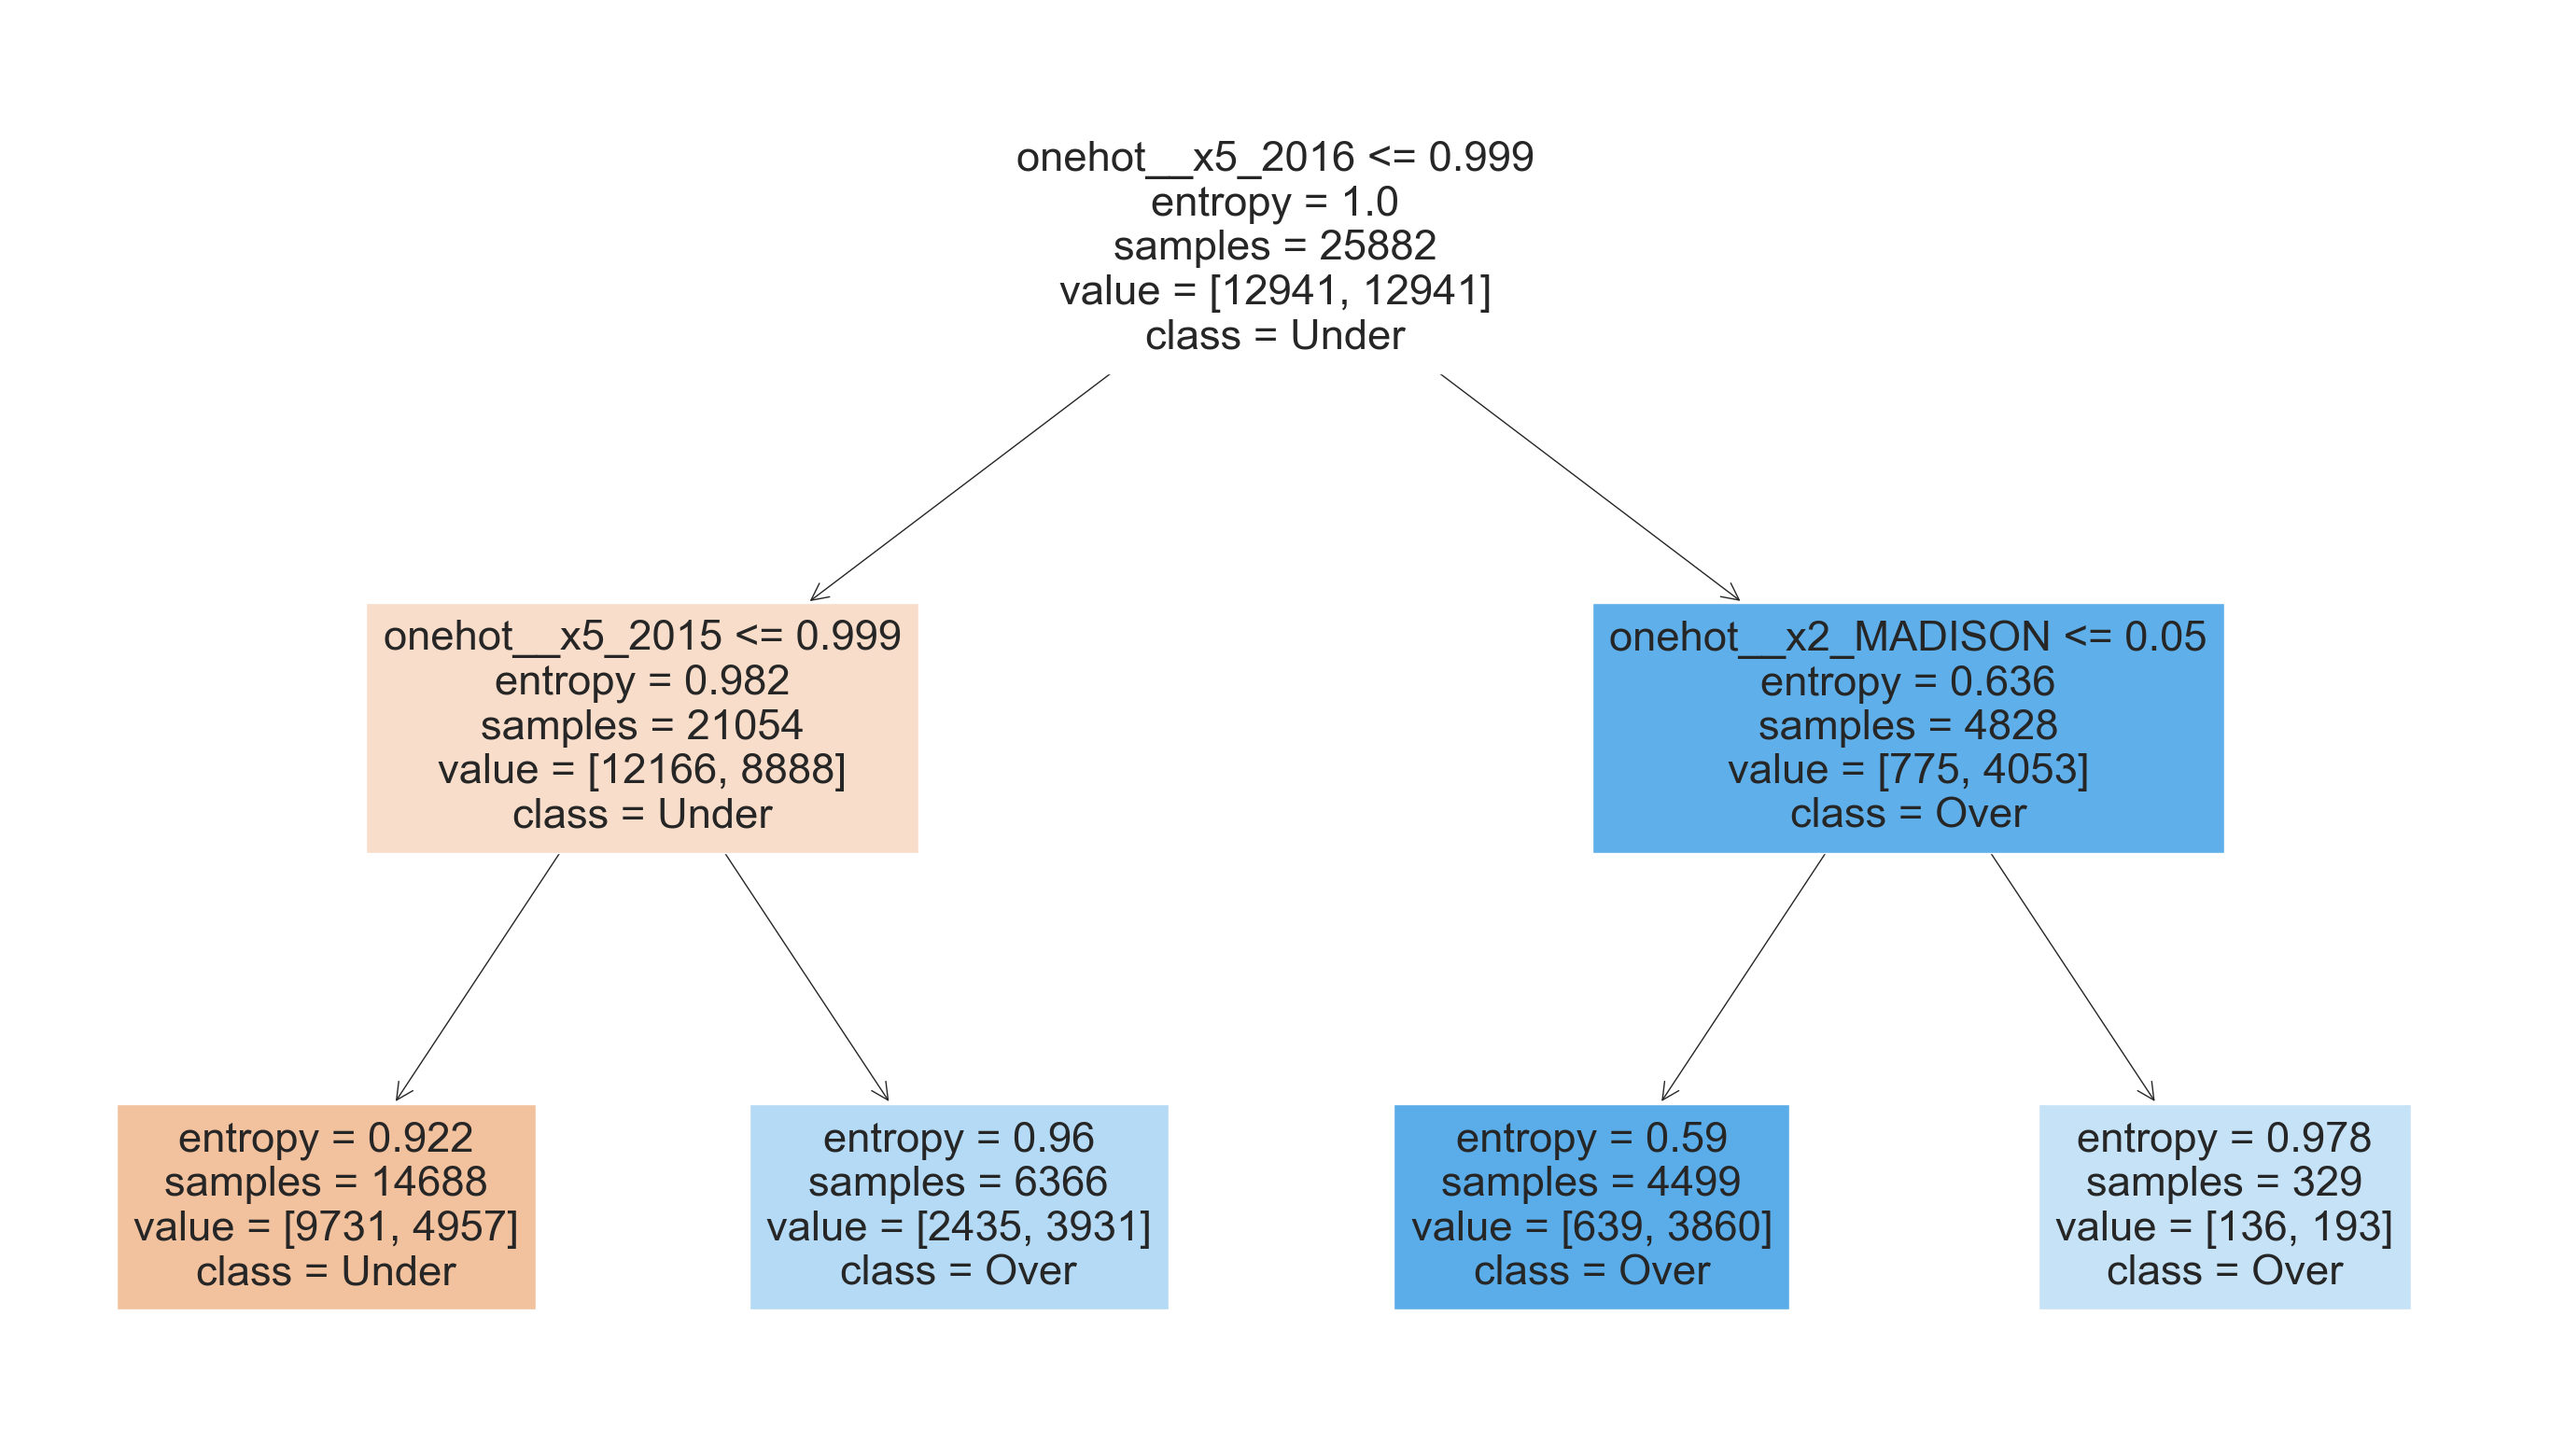

In [46]:
from sklearn import tree
fig = plt.figure(figsize=(35,20))
_ = tree.plot_tree(best_dtc,
                   feature_names=col_name,
                   class_names=['Under', "Over"],
                   filled=True)

### Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
random_f=RandomForestClassifier()
random_f.fit(X_train,y_train)
y_pred=random_f.predict(X_test)

In [49]:
#Grid Search for randomforest
rf_params = {'n_estimators': [5,10,20,50],
            'max_features': [4,6,9,12],
            'min_samples_split': [3, 5, 6, 7]} 
CV_rfc = GridSearchCV(RandomForestClassifier(), rf_params, cv=2, refit=True, verbose=0, scoring = "recall")              
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 6, 7],
                         'max_features': [2, 4, 6, 8],
                         'min_samples_split': [3, 5, 6, 7],
                         'n_estimators': [20, 50, 100, 200, 500]},
             scoring='recall')

In [51]:
print(f'Support Vector Machine:\n\t *best params: {CV_rfc.best_params_}\n\t *best score: {CV_rfc.best_score_}')

Support Vector Machine:
	 *best params: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 4, 'min_samples_split': 3, 'n_estimators': 20}
	 *best score: 0.7959964406648901


In [52]:
#### Using Optimal values of Hyperparameters
best_rf = RandomForestClassifier(n_estimators=20,max_features=4,max_depth=3,criterion='entropy',min_samples_split=3)
best_rf.fit(X_train, y_train)
best_rf_predicted = best_rf.predict(X_test)

In [53]:
# print prediction results
print('Model accuracy score with Grid Search on test set: {0:0.4f}'. format(accuracy_score(y_test, best_rf_predicted)))
print('Model accuracy score with Grid Search on train set: {0:0.4f}'. format(best_rf.score(X_train,y_train)))

print('Training error =', 100*(1-best_rf.score(X_train,y_train)), '%')
print('Testing error', 100*(1-best_rf.score(X_test,y_test)), '%')

print('F1 Score: ',f1_score(y_test, best_rf_predicted))
print(classification_report(y_test, best_rf_predicted))

print('Confusion Matrix : \n' + str(confusion_matrix(y_test,best_rf_predicted)))

Model accuracy score with Grid Search on test set: 0.7182
Model accuracy score with Grid Search on train set: 0.7042
Training error = 29.576539680086544 %
Testing error 28.17764165390505 %
F1 Score:  0.7231417393921157
              precision    recall  f1-score   support

           0       0.73      0.70      0.71      3265
           1       0.71      0.74      0.72      3265

    accuracy                           0.72      6530
   macro avg       0.72      0.72      0.72      6530
weighted avg       0.72      0.72      0.72      6530

Confusion Matrix : 
[[2287  978]
 [ 862 2403]]


In [82]:
feature_importance=pd.DataFrame({"Feature_Name":get_feature_names(preprocessor),"Coef":best_rf.feature_importances_})
feature_importance = feature_importance[['Feature_Name','Coef']]
feature_importance['Importances']=np.abs(feature_importance['Coef'])
feature_importance.sort_values(by='Importances',inplace=True, ascending=False)
feature_importance

C:\Users\seagu\AppData\Local\Temp\ipykernel_22756\1809191144.py:30: UserWarning: Transformer imputer (type SimpleImputer) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
C:\Users\seagu\AppData\Local\Temp\ipykernel_22756\1809191144.py:30: UserWarning: Transformer scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "


Feature_Name      Coef  Importances
40  onehot__x5_2016                       0.223067  0.223067   
37  onehot__x5_2013                       0.204201  0.204201   
10  onehot__x1_No                         0.100002  0.100002   
39  onehot__x5_2015                       0.054795  0.054795   
2   num__Finished_Area                    0.044800  0.044800   
38  onehot__x5_2014                       0.043904  0.043904   
5   num__Total_Value                      0.043005  0.043005   
1   num__Building_Value                   0.041304  0.041304   
48  onehot__x6_8                          0.039435  0.039435   
49  onehot__x6_9                          0.027386  0.027386   
11  onehot__x1_Yes                        0.023984  0.023984   
47  onehot__x6_7                          0.018676  0.018676   
17  onehot__x2_MADISON                    0.016475  0.016475   
24  onehot__x3_CITY OF FOREST HILLS       0.013290  0.013290   
43  onehot__x6_3                          0.012971  0.012971   
41  onehot__x6_1                          0.010379  0.010379   
31  onehot__x4_C                          0.009739  0.009739   
36  onehot__x4_X                          0.009105  0.009105   
26  onehot__x3_CITY OF OAK HILL           0.007132  0.007132   
0   num__Acreage                          0.006711  0.006711   
55  onehot__x7_1981-2000                  0.006511  0.006511   
51  onehot__x6_11                         0.005996  0.005996   
19  onehot__x2_NASHVILLE                  0.004973  0.004973   
22  onehot__x3_CITY OF BELLE MEADE        0.004803  0.004803   
3   num__Bedrooms                         0.003604  0.003604   
44  onehot__x6_4                          0.003309  0.003309   
27  onehot__x3_GENERAL SERVICES DISTRICT  0.002993  0.002993   
52  onehot__x6_12                         0.002819  0.002819   
29  onehot__x4_A                          0.002817  0.002817   
30  onehot__x4_B                          0.002775  0.002775   
57  onehot__x7_<=1940                     0.001854  0.001854   
56  onehot__x7_2000-2017                  0.001728  0.001728   
13  onehot__x2_BRENTWOOD                  0.001238  0.001238   
46  onehot__x6_6                          0.001060  0.001060   
45  onehot__x6_5                          0.000860  0.000860   
50  onehot__x6_10                         0.000730  0.000730   
6   onehot__x0_DUPLEX                     0.000581  0.000581   
28  onehot__x3_URBAN SERVICES DISTRICT    0.000431  0.000431   
20  onehot__x2_OLD HICKORY                0.000391  0.000391   
32  onehot__x4_D                          0.000138  0.000138   
54  onehot__x7_1961-1980                  0.000027  0.000027   
8   onehot__x0_RESIDENTIAL COMBO/MISC     0.000000  0.000000   
25  onehot__x3_CITY OF GOODLETTSVILLE     0.000000  0.000000   
4   num__Half_Bath                        0.000000  0.000000   
53  onehot__x7_1941-1960                  0.000000  0.000000   
33  onehot__x4_E                          0.000000  0.000000   
7   onehot__x0_QUADPLEX                   0.000000  0.000000   
34  onehot__x4_OFB                        0.000000  0.000000   
9   onehot__x0_SINGLE FAMILY              0.000000  0.000000   
18  onehot__x2_MOUNT JULIET               0.000000  0.000000   
12  onehot__x2_ANTIOCH                    0.000000  0.000000   
35  onehot__x4_SSC                        0.000000  0.000000   
23  onehot__x3_CITY OF BERRY HILL         0.000000  0.000000   
21  onehot__x2_WHITES CREEK               0.000000  0.000000   
14  onehot__x2_GOODLETTSVILLE             0.000000  0.000000   
42  onehot__x6_2                          0.000000  0.000000   
15  onehot__x2_HERMITAGE                  0.000000  0.000000   
16  onehot__x2_JOELTON                    0.000000  0.000000   
58  onehot__x7_nan                        0.000000  0.000000

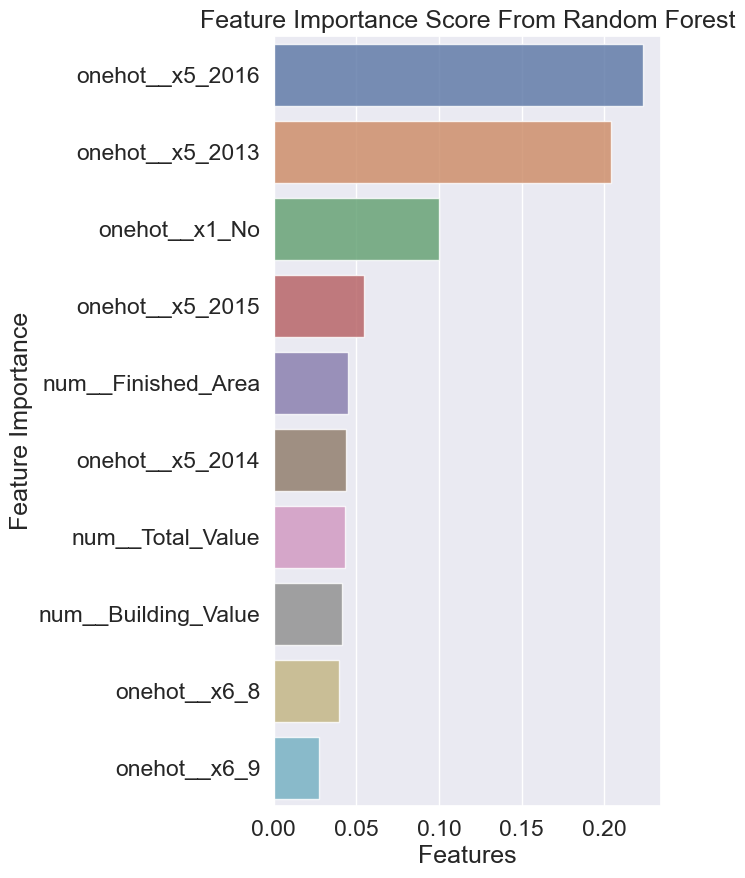

In [83]:
sns.set(font_scale=1.5)
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(5,10))
sns.barplot(feature_importance[0:20].Coef,feature_importance[0:10].Feature_Name,alpha=0.8)
plt.title('Feature Importance Score From Random Forest')
plt.ylabel('Feature Importance')
plt.xlabel('Features')
plt.show()

### Gradient Boost

In [61]:
#Grid Search for GradientBoostingClassifier
param_grid = {'max_depth': [4,6,8,10], 'max_features': [4,6,9,12],'min_samples_leaf':[10,20,50], 'learning_rate': [0.05,0.1, 0.2], 'n_estimators':[5,10,20,100]}
gbc_grid = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, refit=True, verbose=0)
gbc_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [4, 6, 8, 10],
                         'max_features': [4, 6, 9, 12],
                         'min_samples_leaf': [10, 20, 50],
                         'n_estimators': [5, 10, 20, 100]})

In [62]:
print(f'Gradient Boost:\n\t *best params: {gbc_grid.best_params_}\n\t *best score: {gbc_grid.best_score_}')

Gradient Boost:
	 *best params: {'learning_rate': 0.2, 'max_depth': 10, 'max_features': 12, 'min_samples_leaf': 10, 'n_estimators': 100}
	 *best score: 0.8237078070015427


In [63]:
#### Using Optimal values of Hyperparameters
best_gbc = GradientBoostingClassifier(n_estimators=100,max_features=12,max_depth=10,learning_rate=0.2,min_samples_leaf=10)
best_gbc.fit(X_train, y_train)
best_gbc_predicted = best_gbc.predict(X_test)

In [64]:
# print prediction results
print('Model accuracy score with Grid Search on test set: {0:0.4f}'. format(accuracy_score(y_test, best_gbc_predicted)))
print('Model accuracy score with Grid Search on train set: {0:0.4f}'. format(best_gbc.score(X_train,y_train)))

print('Training error =', 100*(1-best_gbc.score(X_train,y_train)), '%')
print('Testing error', 100*(1-best_gbc.score(X_test,y_test)), '%')

print('F1 Score: ',f1_score(y_test, best_gbc_predicted))
print(classification_report(y_test, best_gbc_predicted))

print('Confusion Matrix : \n' + str(confusion_matrix(y_test,best_gbc_predicted)))

Model accuracy score with Grid Search on test set: 0.8190
Model accuracy score with Grid Search on train set: 0.9543
Training error = 4.566880457460787 %
Testing error 18.101071975497707 %
F1 Score:  0.824888888888889
              precision    recall  f1-score   support

           0       0.84      0.79      0.81      3265
           1       0.80      0.85      0.82      3265

    accuracy                           0.82      6530
   macro avg       0.82      0.82      0.82      6530
weighted avg       0.82      0.82      0.82      6530

Confusion Matrix : 
[[2564  701]
 [ 481 2784]]


In [79]:
feature_importance=pd.DataFrame({"Feature_Name":get_feature_names(preprocessor),"Coef":best_gbc.feature_importances_})
feature_importance = feature_importance[['Feature_Name','Coef']]
feature_importance['Importances']=np.abs(feature_importance['Coef'])
feature_importance.sort_values(by='Importances',inplace=True, ascending=False)


C:\Users\seagu\AppData\Local\Temp\ipykernel_22756\1809191144.py:30: UserWarning: Transformer imputer (type SimpleImputer) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
C:\Users\seagu\AppData\Local\Temp\ipykernel_22756\1809191144.py:30: UserWarning: Transformer scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "


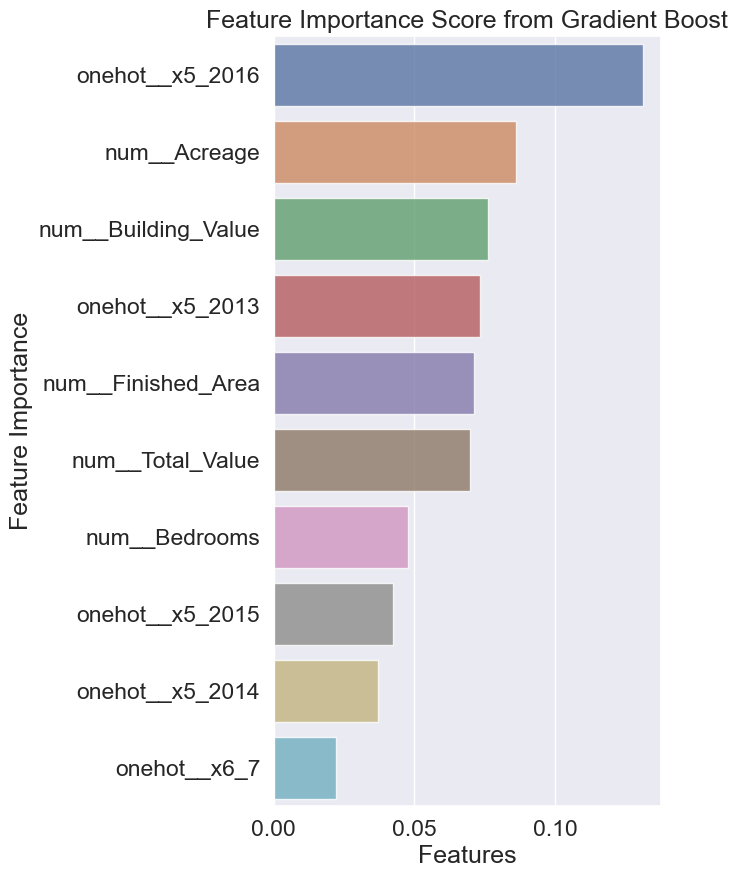

In [81]:
sns.set(font_scale=1.5)
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(5,10))
sns.barplot(feature_importance[0:20].Coef,feature_importance[0:10].Feature_Name,alpha=0.8)
plt.title('Feature Importance Score from Gradient Boost')
plt.ylabel('Feature Importance')
plt.xlabel('Features')
plt.show()

## Model Comparison

In [60]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [67]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, best_log_reg.predict_proba(X_test)[:,1])
fpr_dc, tpr_dc, _ = roc_curve(y_test, best_dtc.predict_proba(X_test)[:,1])

fpr_rf, tpr_rf, _ = roc_curve(y_test, best_rf.predict_proba(X_test)[:,1])
fpr_gb, tpr_gb, _ = roc_curve(y_test, best_gbc.predict_proba(X_test)[:,1])

In [68]:
lr_roc_auc = roc_auc_score(y_test, best_log_reg.predict_proba(X_test)[:,1] , average = 'macro')
dc_roc_auc = roc_auc_score(y_test, best_dtc.predict_proba(X_test)[:,1] , average = 'macro')
rf_roc_auc = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:,1] , average = 'macro')
gb_roc_auc = roc_auc_score(y_test, best_gbc.predict_proba(X_test)[:,1] , average = 'macro')

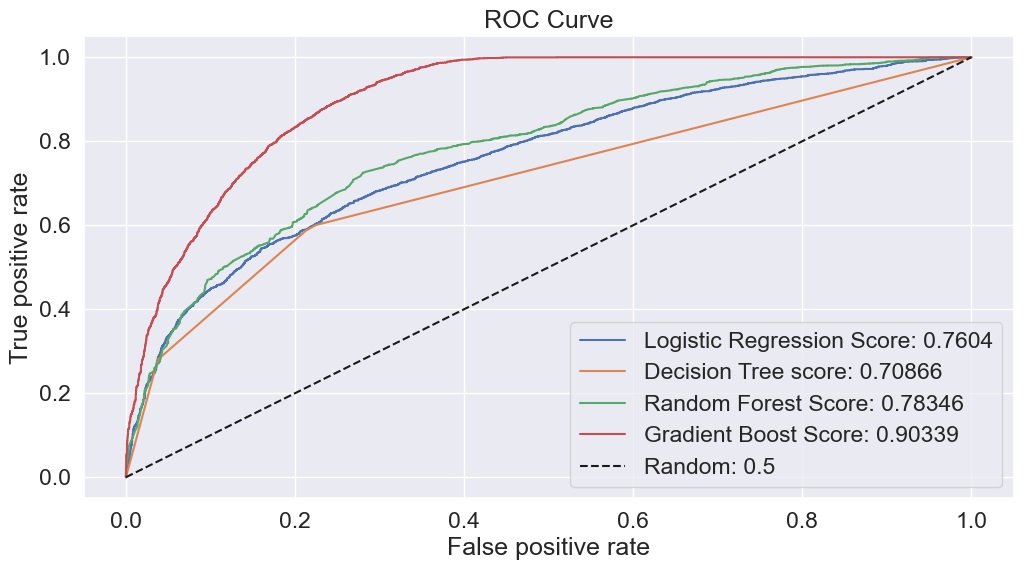

In [69]:
plt.figure(figsize = (12,6), linewidth= 1)

plt.plot(fpr_lr, tpr_lr, label = 'Logistic Regression Score: ' + str(round(lr_roc_auc, 5)))
plt.plot(fpr_dc, tpr_dc, label = 'Decision Tree score: ' + str(round(dc_roc_auc, 5)))
plt.plot(fpr_rf, tpr_rf, label = 'Random Forest Score: ' + str(round(rf_roc_auc, 5)))
plt.plot(fpr_gb, tpr_gb, label = 'Gradient Boost Score: ' + str(round(gb_roc_auc, 5)))


plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

In [72]:
lr_acc=best_log_reg.score(X_test,y_test)
dc_acc=best_dtc.score(X_test,y_test)
rf_acc=best_rf.score(X_test,y_test)
gb_acc=best_gbc.score(X_test,y_test)

In [73]:
lr_recall=recall_score(y_test, log_reg_predicted)
dc_recall=recall_score(y_test, best_dtc_predicted)
rf_recall=recall_score(y_test, best_rf_predicted)
gb_recall=recall_score(y_test, best_gbc_predicted)

lr_pre=precision_score(y_test, log_reg_predicted)
dc_pre=precision_score(y_test, best_dtc_predicted)
rf_pre=precision_score(y_test, best_rf_predicted)
gb_pre=precision_score(y_test, best_gbc_predicted)

In [74]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
accuracy = [lr_acc,dc_acc,rf_acc, gb_acc]
recall=[lr_recall,dc_recall,rf_recall,gb_recall]
precision=[lr_pre,dc_pre,rf_pre,gb_pre]
roc_auc = [lr_roc_auc, dc_roc_auc, rf_roc_auc, gb_roc_auc]

d = {'accuracy': accuracy,'recall':recall,'precision':precision,'roc_auc': roc_auc}
df_metrics = pd.DataFrame(d, index = models)
df_metrics

accuracy    recall  precision   roc_auc
Logistic Regression  0.692190  0.665850  0.702877   0.760401
Decision Tree        0.687902  0.600306  0.727813   0.708660
Random Forest        0.718224  0.735988  0.710736   0.783461
Gradient Boosting    0.818989  0.852680  0.798852   0.903392